In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Define paths
#---------------------------------------------------------------------------
c_path = '/content/drive/MyDrive/PhD/Analysis/py_scripts/suite2p_analysis_py'
d_path = '/content/drive/MyDrive/PhD/Analysis/Project/PTZ-WILDTYPE/'
# Define imports
#---------------------------------------------------------------------------
import os
import glob 
import re
import numpy as np
import matplotlib.pyplot as plt
import shutil
import scipy.misc
from scipy import ndimage
import math
from skimage import io
import pandas as pd
import seaborn as sns

os.chdir(c_path)
import admin_functions as adfn
plt.style.use('default')

%load_ext autoreload
%autoreload

In [ ]:
# Create datalists
#---------------------------------------------------------------------------
experiment = 'PTZ-WILDTYPE'
os.chdir(d_path)
bln_blist = sorted(glob.glob('*BLN*_binarised*')) 
foc_blist = sorted(glob.glob('*PTZ05*_binarised*')) 
gen_blist = sorted(glob.glob('*PTZ20*_binarised*')) 
bln_tlist = sorted(glob.glob('*BLN*cutrealtrace*')) 
foc_tlist = sorted(glob.glob('*PTZ05*cutrealtrace*')) 
gen_tlist = sorted(glob.glob('*PTZ20*cutrealtrace*'))
bln_blist, foc_blist, gen_blist

(['PTZ-WILDTYPE-02_2photon_sess-01-6dpf_BLN_run-01_0.590_binarised.npy',
  'PTZ-WILDTYPE-03_2photon_sess-01-6dpf_BLN_run-01_0.590_binarised.npy',
  'PTZ-WILDTYPE-04_2photon_sess-01-6dpf_BLN_run-01_0.590_binarised.npy',
  'PTZ-WILDTYPE-05_2photon_sess-01-6dpf_BLN_run-01_0.590_binarised.npy',
  'PTZ-WILDTYPE-06_2photon_sess-01-6dpf_BLN_run-01_0.590_binarised.npy',
  'PTZ-WILDTYPE-07_2photon_sess-01-6dpf_BLN_run-01_0.590_binarised.npy',
  'PTZ-WILDTYPE-08_2photon_sess-01-6dpf_BLN_run-01_0.590_binarised.npy',
  'PTZ-WILDTYPE-09_2photon_sess-01-6dpf_BLN_run-01_0.590_binarised.npy',
  'PTZ-WILDTYPE-10_2photon_sess-01-6dpf_BLN_run-01_0.590_binarised.npy',
  'PTZ-WILDTYPE-11_2photon_sess-01-6dpf_BLN_run-01_0.590_binarised.npy',
  'PTZ-WILDTYPE-12_2photon_sess-01-6dpf_BLN_run-09_0.590_binarised.npy'],
 ['PTZ-WILDTYPE-02_2photon_sess-01-6dpf_PTZ05_run-01_0.590_binarised.npy',
  'PTZ-WILDTYPE-03_2photon_sess-01-6dpf_PTZ05_run-01_0.590_binarised.npy',
  'PTZ-WILDTYPE-04_2photon_sess-01-6dpf_PTZ05_

In [ ]:
# Create datalists
#---------------------------------------------------------------------------
experiment = 'PTZ-WILDTYPE'
os.chdir(d_path)
bln_blist = sorted(glob.glob('*randbase*binarised*')) 
pre_blist = sorted(glob.glob('*preictal*binarised*')) 
ons_blist = sorted(glob.glob('*_ictal*binarised*')) 
bln_blist, pre_blist, ons_blist

(['PTZ-WILDTYPE-02_2photon_sess-01-6dpf_BLN_run-01_randbase-binarised.npy',
  'PTZ-WILDTYPE-04_2photon_sess-01-6dpf_BLN_run-01_randbase-binarised.npy',
  'PTZ-WILDTYPE-05_2photon_sess-01-6dpf_BLN_run-01_randbase-binarised.npy',
  'PTZ-WILDTYPE-07_2photon_sess-01-6dpf_BLN_run-01_randbase-binarised.npy',
  'PTZ-WILDTYPE-08_2photon_sess-01-6dpf_BLN_run-01_randbase-binarised.npy',
  'PTZ-WILDTYPE-09_2photon_sess-01-6dpf_BLN_run-01_randbase-binarised.npy',
  'PTZ-WILDTYPE-10_2photon_sess-01-6dpf_BLN_run-01_randbase-binarised.npy',
  'PTZ-WILDTYPE-11_2photon_sess-01-6dpf_BLN_run-01_randbase-binarised.npy',
  'PTZ-WILDTYPE-12_2photon_sess-01-6dpf_BLN_run-01_randbase-binarised.npy'],
 ['PTZ-WILDTYPE-02_2photon_sess-01-6dpf_PTZ20_run-01_preictal-binarised.npy',
  'PTZ-WILDTYPE-04_2photon_sess-01-6dpf_PTZ20_run-01_preictal-binarised.npy',
  'PTZ-WILDTYPE-05_2photon_sess-01-6dpf_PTZ20_run-01_preictal-binarised.npy',
  'PTZ-WILDTYPE-07_2photon_sess-01-6dpf_PTZ20_run-01_preictal-binarised.npy',
  '

# Meta stability

In [ ]:
#Load data
choose = 0
b_b = np.load(bln_blist[choose])
f_b = np.load(foc_blist[choose])
g_b = np.load(gen_blist[choose])
bin_list = b_b,f_b,g_b

b_t = np.load(bln_tlist[choose])
f_t = np.load(foc_tlist[choose])
g_t = np.load(gen_tlist[choose])
trace_list = b_t,f_t,g_t

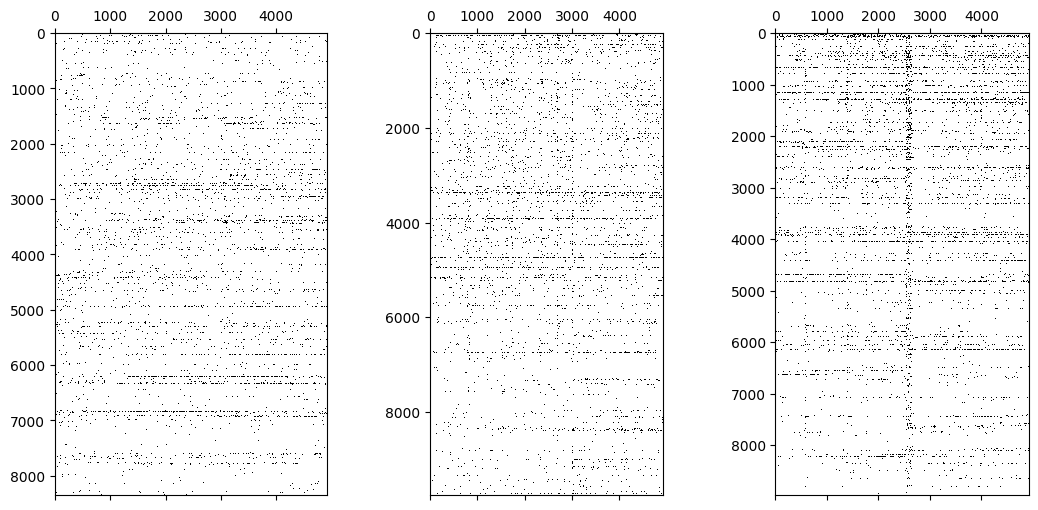

In [ ]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib import colors
fig, axarr = plt.subplots(1,3,figsize = (13,6))

for i in range(len(bin_list)):
    curr = bin_list[i]
    axarr[i].matshow(curr, cmap = 'Greys')
plt.show()

In [ ]:
data_embed

array([[1320907.11943477, -629639.6871852 ,   -3422.33333544],
       [1320266.52743207, -629271.01771134,   -3413.10249721],
       [1319723.3889962 , -628958.1951949 ,   -3405.2601785 ],
       ...,
       [-911871.83443646, -180007.32184515,   -2448.7979472 ],
       [-896303.49424682, -176880.57560685,   -2201.40292777],
       [-911795.61280415, -179992.96245423,   -2447.76805711]])

In [ ]:
# Create datalists
#---------------------------------------------------------------------------
experiment = 'PTZ-WILDTYPE'
os.chdir(d_path)
bln_blist = sorted(glob.glob('*BLN*_binarised*')) 
foc_blist = sorted(glob.glob('*PTZ05*_binarised*')) 
gen_blist = sorted(glob.glob('*PTZ20*_binarised*')) 
bln_blist, foc_blist, gen_blist

(['PTZ-WILDTYPE-02_2photon_sess-01-6dpf_BLN_run-01_0.590_binarised.npy',
  'PTZ-WILDTYPE-03_2photon_sess-01-6dpf_BLN_run-01_0.590_binarised.npy',
  'PTZ-WILDTYPE-04_2photon_sess-01-6dpf_BLN_run-01_0.590_binarised.npy',
  'PTZ-WILDTYPE-05_2photon_sess-01-6dpf_BLN_run-01_0.590_binarised.npy',
  'PTZ-WILDTYPE-06_2photon_sess-01-6dpf_BLN_run-01_0.590_binarised.npy',
  'PTZ-WILDTYPE-07_2photon_sess-01-6dpf_BLN_run-01_0.590_binarised.npy',
  'PTZ-WILDTYPE-08_2photon_sess-01-6dpf_BLN_run-01_0.590_binarised.npy',
  'PTZ-WILDTYPE-09_2photon_sess-01-6dpf_BLN_run-01_0.590_binarised.npy',
  'PTZ-WILDTYPE-10_2photon_sess-01-6dpf_BLN_run-01_0.590_binarised.npy',
  'PTZ-WILDTYPE-11_2photon_sess-01-6dpf_BLN_run-01_0.590_binarised.npy',
  'PTZ-WILDTYPE-12_2photon_sess-01-6dpf_BLN_run-09_0.590_binarised.npy'],
 ['PTZ-WILDTYPE-02_2photon_sess-01-6dpf_PTZ05_run-01_0.590_binarised.npy',
  'PTZ-WILDTYPE-03_2photon_sess-01-6dpf_PTZ05_run-01_0.590_binarised.npy',
  'PTZ-WILDTYPE-04_2photon_sess-01-6dpf_PTZ05_

In [ ]:
#Cluster with affinity propagation
def affprop(data):
  cluster = AffinityPropagation(damping = 0.5, max_iter = 200, convergence_iter = 15).fit(data)
  unq,counts = np.unique(cluster.labels_, return_counts = True)
  all_c = cluster.labels_
  sub_c = unq[counts > 1]
  return(all_c, sub_c)

#Similarity
def Similarity(curr_clust):
  ijdot = np.inner(curr_clust, curr_clust)
  self_dot = np.apply_along_axis(np.max,0,ijdot)
  idot = np.reshape(np.repeat(self_dot, ijdot.shape[0]), ijdot.shape)
  jdot = np.reshape(np.repeat(self_dot, ijdot.shape[0]), ijdot.shape).T
  sim_mat = np.triu(ijdot / (idot + jdot - ijdot))
  np.fill_diagonal(sim_mat,0)
  mean_sim = np.mean(sim_mat[np.nonzero(sim_mat)])
  return(mean_sim)

def Sim_loop(data, all_clust, sub_clust):
  sim_list = list(range(len(sub_clust)))
  for i in range(len(sub_clust)):
    curr_clust = data[np.where(all_clust == sub_clust[i])[0]]
    sim_list[i] = Similarity(curr_clust)
  return(sim_list)


def state_stats(fin_clust, all_clust):
  import more_itertools as mit

  p_state, m_dwell = np.zeros(len(fin_clust)),np.zeros(len(fin_clust))
  full_vec = list(range(len(fin_clust)))
  for i in range(len(fin_clust)):
    p_state[i] = len(np.where(all_clust == fin_clust[i])[0])/len(all_clust)

    dur_list = [list(group) for group in mit.consecutive_groups(np.where(all_clust == fin_clust[i])[0])]
    vec = []
    for t in range(len(dur_list)):
      vec = np.append(vec, len(dur_list[t]))
    m_dwell[i] = np.mean(vec)
    full_vec[i] = vec
  return(p_state, m_dwell, full_vec)

def null_states(fin_clust, data):
  import random
  import more_itertools as mit

  all_states = np.arange(1,len(fin_clust)+1)
  rand_states = np.array(random.choices(all_states, k = data.shape[0]))
  dur_list = [list(group) for group in mit.consecutive_groups(rand_states)]
  vec = []
  for t in range(len(dur_list)):
    vec = np.append(vec, len(dur_list[t]))
  null_m_dwell = np.mean(vec)
  return(null_m_dwell)

In [ ]:
from sklearn.cluster import AffinityPropagation
import copy

data_list = bln_blist, foc_blist, gen_blist
for e in range(len(data_list)):
  for i in range(len(data_list[e])):
    data = np.load(data_list[e][i])[:,1:4913].T
    name = data_list[e][i]

    #Empirical data
    all_clust, sub_clust = affprop(data)
    emp_sim = Sim_loop(data, all_clust, sub_clust)

    #Null data
    rpks = np.zeros((data.shape))
    for t in range(data.shape[0]):
        temp_pks = data[t]
        np.random.shuffle(temp_pks) 
        rpks[t] = temp_pks

    null_all_clust, null_sub_clust = affprop(rpks)
    null_sim = Sim_loop(rpks, null_all_clust, null_sub_clust)
    n_states = len(emp_sim > np.max(null_sim))
    if len(emp_sim) > n_states:
      print('null model removed a cluster')

    #Calculate state statistics
    fin_clust = sub_clust[emp_sim > max(null_sim)]
    p_state, m_dwell, v_dwell = state_stats(fin_clust, all_clust)
    null_m_dwell = null_states(fin_clust, data)
    np.save(d_path +  name[:name.find('run')+6] + '_' +'metastates.npy', [n_states, p_state, m_dwell, null_m_dwell, v_dwell]) 

  print('Done' + str(e))

In [ ]:
# Create datalists
#---------------------------------------------------------------------------
experiment = 'PTZ-WILDTYPE'
os.chdir(d_path)
bln_list = sorted(glob.glob('*BLN*_meta*')) 
foc_list = sorted(glob.glob('*PTZ05*_meta*')) 
gen_list = sorted(glob.glob('*PTZ20*_meta*'))
bln_list, foc_list, gen_list

(['PTZ-WILDTYPE-02_2photon_sess-01-6dpf_BLN_run-01_metastates.npy',
  'PTZ-WILDTYPE-03_2photon_sess-01-6dpf_BLN_run-01_metastates.npy',
  'PTZ-WILDTYPE-04_2photon_sess-01-6dpf_BLN_run-01_metastates.npy',
  'PTZ-WILDTYPE-05_2photon_sess-01-6dpf_BLN_run-01_metastates.npy',
  'PTZ-WILDTYPE-06_2photon_sess-01-6dpf_BLN_run-01_metastates.npy',
  'PTZ-WILDTYPE-07_2photon_sess-01-6dpf_BLN_run-01_metastates.npy',
  'PTZ-WILDTYPE-08_2photon_sess-01-6dpf_BLN_run-01_metastates.npy',
  'PTZ-WILDTYPE-09_2photon_sess-01-6dpf_BLN_run-01_metastates.npy',
  'PTZ-WILDTYPE-10_2photon_sess-01-6dpf_BLN_run-01_metastates.npy',
  'PTZ-WILDTYPE-11_2photon_sess-01-6dpf_BLN_run-01_metastates.npy',
  'PTZ-WILDTYPE-12_2photon_sess-01-6dpf_BLN_run-09_metastates.npy'],
 ['PTZ-WILDTYPE-02_2photon_sess-01-6dpf_PTZ05_run-01_metastates.npy',
  'PTZ-WILDTYPE-03_2photon_sess-01-6dpf_PTZ05_run-01_metastates.npy',
  'PTZ-WILDTYPE-04_2photon_sess-01-6dpf_PTZ05_run-01_metastates.npy',
  'PTZ-WILDTYPE-05_2photon_sess-01-6dpf_P

In [ ]:
data_list = bln_list, foc_list, gen_list
data_type = 0 #number of states
staten_list = list(range(len(data_list)))
for i in range(len(data_list)):
  staten = np.zeros(len(data_list[i]))
  for e in range(len(staten)):
    staten[e] = np.load(data_list[i][e], allow_pickle=True)[data_type]
    staten_list[i] = staten

In [ ]:
currdata_list = np.delete(np.array(staten_list), 4, 1)
import pandas as pd

states = list(range(30))
cond = list(range(30))

cond_list = ['BLN', 'FOC', 'GEN']
count=0
e_count = 0
for i in range(len(currdata_list)):
    for x in range(len(currdata_list[i])):
          states[count] = currdata_list[i][x]
          cond[count] = cond_list[i]
          count+=1
meta_df = pd.DataFrame({"states":states , "condition": cond})

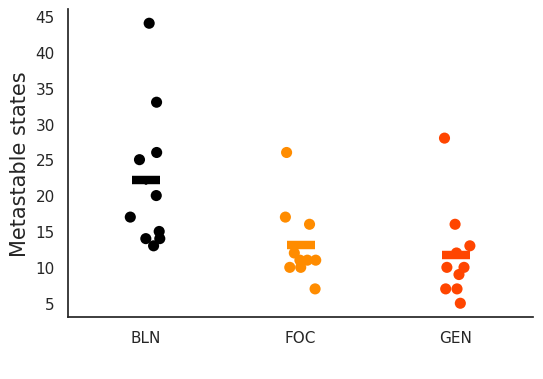

In [ ]:
from matplotlib.collections import PathCollection
from matplotlib import cm
sns.set(style="white")
colors = ['black', 'darkorange','orangered']
fig, ax = plt.subplots(figsize = (6,4))
ax = sns.pointplot(x="condition", y="states", data = meta_df, hue = 'condition', palette = colors, join=False, ci=2, scale=3, markers='_')
for artist in ax.lines:
    artist.set_zorder(10)
for artist in ax.findobj(PathCollection):
    artist.set_zorder(11)
ax = sns.stripplot(x="condition", y="states", data = meta_df, hue = 'condition', palette = colors, size = 8, jitter = True ,alpha = 1)

points = ax.collections
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel(' ', size = '13')
ax.set_ylabel('Metastable states', size = '15')
ax.legend_.remove()
#plt.ylim(0.5,1.3)
plt.show()

In [ ]:
bln_meta = meta_df[meta_df['condition'] == 'BLN']
p5_meta = meta_df[meta_df['condition'] == 'FOC']
p20_meta = meta_df[meta_df['condition'] == 'GEN']

meta_list = bln_meta, p5_meta, p20_meta

In [ ]:
from scipy import stats
data = bln_meta['states']
mean = np.mean(data)
sem = stats.sem(data)
print(mean, sem)

22.1 3.1918298478737515


In [ ]:
from scipy import stats
data = p5_meta['states']
mean = np.mean(data)
sem = stats.sem(data)
print(mean, sem)

13.1 1.7026123718829511


In [ ]:
from scipy import stats
data = p20_meta['states']
mean = np.mean(data)
sem = stats.sem(data)
print(mean, sem)

11.7 2.0765890836230025


In [ ]:
for i in range(len(meta_list)):
    p = stats.normaltest(meta_list[i]['states'])[1]
    alpha = 0.05
    if p > alpha:
        print('Sample looks Gaussian (fail to reject H0)')
    else:
        print('Sample does not look Gaussian (reject H0)')

Sample looks Gaussian (fail to reject H0)
Sample does not look Gaussian (reject H0)
Sample does not look Gaussian (reject H0)


/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


In [ ]:
from scipy.stats import wilcoxon
alpha = 0.05/2

w, p = wilcoxon(bln_meta['states'], p5_meta['states'])
print('w = ' + str(w) +  '   p = ' + str(p))
if p > alpha:
    print('Samples are the same')
else:
    print('Samples are significantly different')

w = 1.0   p = 0.010177442378203762
Samples are significantly different


/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:2879: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


In [ ]:
from scipy.stats import wilcoxon
alpha = 0.05/2

w, p = wilcoxon(bln_meta['states'], p20_meta['states'])
print('w = ' + str(w) +  '   p = ' + str(p))
if p > alpha:
    print('Samples are the same')
else:
    print('Samples are significantly different')

w = 1.0   p = 0.006874035817356707
Samples are significantly different


In [ ]:
data_list = bln_list, foc_list, gen_list
data_type = 2 #dwell time per state
dwellt_list, null_dwellt_list = list(range(len(data_list))),list(range(len(data_list)))
for i in range(len(data_list)):
  dwellt, null_dwellt = np.zeros(len(data_list[i])),np.zeros(len(data_list[i]))
  for e in range(len(dwellt)):
    dwellt[e] = np.mean(np.load(data_list[i][e], allow_pickle=True)[data_type])
    null_dwellt[e] = np.load(data_list[i][e], allow_pickle=True)[data_type + 1]
    dwellt_list[i] = dwellt
    null_dwellt_list[i] = null_dwellt

In [ ]:
currdata_list = np.delete(np.array(dwellt_list), 4, 1)
currnull_list = np.delete(np.array(null_dwellt_list), 4, 1)
full_list = currdata_list, currnull_list
import pandas as pd

dt = list(range(60))
cond = list(range(60))
null = list(range(60))

cond_list = ['BLN', 'FOC', 'GEN']
null_list = ['emp', 'null']
count=0

for o in range(len(full_list)):
  for i in range(len(full_list[o])):
      for x in range(len(full_list[o][i])):
            dt[count] = full_list[o][i][x]
            cond[count] = cond_list[i]
            null[count] = null_list[o]
            count+=1
dt_df = pd.DataFrame({"dwell time":dt , "condition": cond, "null": null})

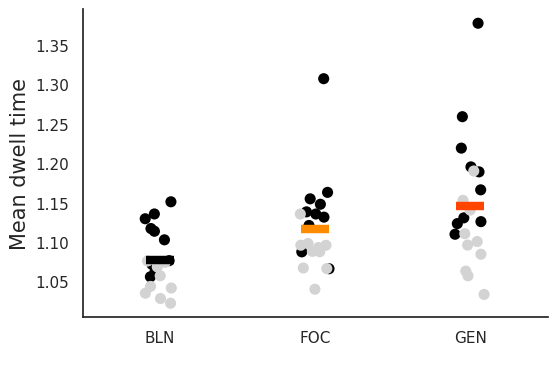

In [ ]:
from matplotlib.collections import PathCollection
from matplotlib import cm
sns.set(style="white")
colors = ['black', 'darkorange','orangered']
colors1 = ['black', 'lightgrey']
fig, ax = plt.subplots(figsize = (6,4))
ax = sns.pointplot(x="condition", y="dwell time", data = dt_df, hue = 'condition', palette = colors, join=False, ci=2, scale=3, markers='_')
for artist in ax.lines:
    artist.set_zorder(10)
for artist in ax.findobj(PathCollection):
    artist.set_zorder(11)
ax = sns.stripplot(x="condition", y="dwell time", data = dt_df, hue = 'null', palette = colors1, size = 8, jitter = True ,alpha = 1)

points = ax.collections
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel(' ', size = '13')
ax.set_ylabel('Mean dwell time', size = '15')
ax.legend_.remove()
#plt.ylim(0.5,1.3)
plt.show()

In [ ]:
bln_dt = dt_df[(dt_df['condition'] == 'BLN') & (dt_df['null'] == 'emp')]
p5_dt = dt_df[(dt_df['condition'] == 'FOC') & (dt_df['null'] == 'emp')]
p20_dt = dt_df[(dt_df['condition'] == 'GEN') & (dt_df['null'] == 'emp')]

dt_list = bln_dt, p5_dt, p20_dt

In [ ]:
from scipy import stats
data = bln_dt['dwell time']
mean = np.mean(data)
sem = stats.sem(data)
print(mean, sem)

1.1018839505408249 0.010473372696534557


In [ ]:
from scipy import stats
data = p5_dt['dwell time']
mean = np.mean(data)
sem = stats.sem(data)
print(mean, sem)

1.1454787438455318 0.020289264428815852


In [ ]:
from scipy import stats
data = p20_dt['dwell time']
mean = np.mean(data)
sem = stats.sem(data)
print(mean, sem)

1.1897178517114673 0.025755466807621703


In [ ]:
for i in range(len(dt_list)):
    p = stats.normaltest(dt_list[i]['dwell time'])[1]
    alpha = 0.05
    if p > alpha:
        print('Sample looks Gaussian (fail to reject H0)')
    else:
        print('Sample does not look Gaussian (reject H0)')

Sample looks Gaussian (fail to reject H0)
Sample does not look Gaussian (reject H0)
Sample does not look Gaussian (reject H0)


/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


In [ ]:
from scipy.stats import wilcoxon
alpha = 0.05/2

w, p = wilcoxon(bln_dt['dwell time'], p5_dt['dwell time'])
print('w = ' + str(w) +  '   p = ' + str(p))
if p > alpha:
    print('Samples are the same')
else:
    print('Samples are significantly different')

w = 2.0   p = 0.009344113002204883
Samples are significantly different


In [ ]:
from scipy.stats import wilcoxon
alpha = 0.05/2

w, p = wilcoxon(bln_dt['dwell time'], p20_dt['dwell time'])
print('w = ' + str(w) +  '   p = ' + str(p))
if p > alpha:
    print('Samples are the same')
else:
    print('Samples are significantly different')

w = 1.0   p = 0.0069104298078147995
Samples are significantly different


In [ ]:
bln_null = dt_df[(dt_df['condition'] == 'BLN') & (dt_df['null'] == 'null')]
p5_null = dt_df[(dt_df['condition'] == 'FOC') & (dt_df['null'] == 'null')]
p20_null = dt_df[(dt_df['condition'] == 'GEN') & (dt_df['null'] == 'null')]
null_list = bln_null, p5_null, p20_null


In [ ]:
from scipy import stats
data = bln_null['dwell time']
mean = np.mean(data)
sem = stats.sem(data)
print(mean, sem)

1.052377888111501 0.006436763435810769


In [ ]:
from scipy import stats
data = p5_null['dwell time']
mean = np.mean(data)
sem = stats.sem(data)
print(mean, sem)

1.087056307166235 0.00794394583903488


In [ ]:
from scipy import stats
data = p20_null['dwell time']
mean = np.mean(data)
sem = stats.sem(data)
print(mean, sem)

1.1031694168198762 0.015051119048098196


In [ ]:
for i in range(len(null_list)):
    p = stats.normaltest(null_list[i]['dwell time'])[1]
    alpha = 0.05
    if p > alpha:
        print('Sample looks Gaussian (fail to reject H0)')
    else:
        print('Sample does not look Gaussian (reject H0)')

Sample looks Gaussian (fail to reject H0)
Sample looks Gaussian (fail to reject H0)
Sample looks Gaussian (fail to reject H0)


/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


In [ ]:
#BLN - PTZ5
alpha = 0.05

t, p = stats.ttest_rel(bln_dt['dwell time'], bln_null['dwell time'])
print('t = ' + str(t) +  '   p = ' + str(p))
if p > alpha:
    print('Samples are the same')
else:
    print('Samples are significantly different')

t = 4.55840883516737   p = 0.0013693779164457528
Samples are significantly different


In [ ]:
from scipy.stats import wilcoxon
alpha = 0.05

w, p = wilcoxon(p5_dt['dwell time'], p5_null['dwell time'])
print('w = ' + str(w) +  '   p = ' + str(p))
if p > alpha:
    print('Samples are the same')
else:
    print('Samples are significantly different')

w = 1.0   p = 0.0069104298078147995
Samples are significantly different


In [ ]:
from scipy.stats import wilcoxon
alpha = 0.05

w, p = wilcoxon(p20_dt['dwell time'], p20_null['dwell time'])
print('w = ' + str(w) +  '   p = ' + str(p))
if p > alpha:
    print('Samples are the same')
else:
    print('Samples are significantly different')

w = 0.0   p = 0.005062032126267864
Samples are significantly different


In [ ]:
bln_change = np.array(bln_dt['dwell time'])  - np.array(bln_null['dwell time']) 
p5_change = np.array(p5_dt['dwell time'])  - np.array(p5_null['dwell time']) 
p20_change = np.array(p20_dt['dwell time']) - np.array(p20_null['dwell time']) 
change_list = bln_change, p5_change, p20_change
change_list

(array([0.0912156 , 0.12254031, 0.02981109, 0.05512083, 0.01915194,
        0.06189792, 0.01918219, 0.04106918, 0.03428748, 0.02078409]),
 array([ 0.17144182,  0.09649126,  0.04733162,  0.042279  ,  0.03734511,
         0.05878349, -0.00092815,  0.03852121,  0.03327716,  0.05968186]),
 array([0.09218964, 0.10839679, 0.10598245, 0.03877201, 0.06993423,
        0.18717598, 0.05470856, 0.08828134, 0.05261083, 0.06743251]))

In [ ]:
full_list = bln_change, p5_change, p20_change
import pandas as pd

dt = list(range(30))
cond = list(range(30))

cond_list = ['BLN', 'FOC', 'GEN']
count=0

for i in range(len(full_list)):
    for x in range(len(full_list[i])):
          dt[count] = full_list[i][x]
          cond[count] = cond_list[i]
          count+=1
dt_df = pd.DataFrame({"dwell time ratio":dt , "condition": cond})

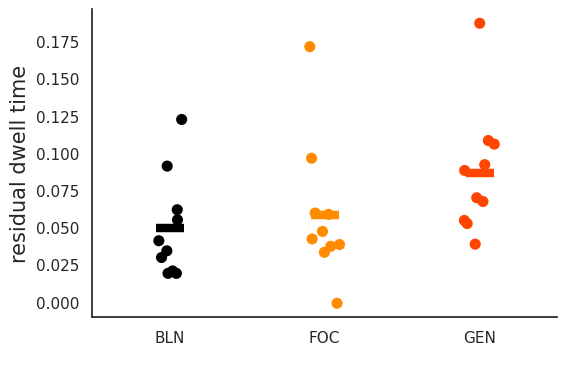

In [ ]:
from matplotlib.collections import PathCollection
from matplotlib import cm
sns.set(style="white")
colors = ['black', 'darkorange','orangered']
fig, ax = plt.subplots(figsize = (6,4))
ax = sns.pointplot(x="condition", y="dwell time ratio", data = dt_df, hue = 'condition', palette = colors, join=False, ci=2, scale=3, markers='_')
for artist in ax.lines:
    artist.set_zorder(10)
for artist in ax.findobj(PathCollection):
    artist.set_zorder(11)
ax = sns.stripplot(x="condition", y="dwell time ratio", data = dt_df, hue = 'condition', palette = colors, size = 8, jitter = True ,alpha = 1)

points = ax.collections
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel(' ', size = '13') 
ax.set_ylabel('residual dwell time', size = '15')
ax.legend_.remove()
#plt.ylim(0.5,1.3)
plt.show()

In [ ]:
from scipy import stats
data = bln_change
mean = np.mean(data)
sem = stats.sem(data)
print(mean, sem)

0.04950606242932383 0.010860382256061094


In [ ]:
from scipy import stats
data = p5_change
mean = np.mean(data)
sem = stats.sem(data)
print(mean, sem)

0.05842243667929674 0.014758439318868855


In [ ]:
from scipy import stats
data = p20_change
mean = np.mean(data)
sem = stats.sem(data)
print(mean, sem)

0.08654843489159103 0.013377151109339997


In [ ]:
for i in range(len(change_list)):
    p = stats.normaltest(change_list[i])[1]
    alpha = 0.05
    if p > alpha:
        print('Sample looks Gaussian (fail to reject H0)')
    else:
        print('Sample does not look Gaussian (reject H0)')

Sample looks Gaussian (fail to reject H0)
Sample does not look Gaussian (reject H0)
Sample does not look Gaussian (reject H0)


/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


In [ ]:
from scipy.stats import wilcoxon
alpha = 0.05/2

w, p = wilcoxon(bln_change, p5_change)
print('w = ' + str(w) +  '   p = ' + str(p))
if p > alpha:
    print('Samples are the same')
else:
    print('Samples are significantly different')

w = 25.0   p = 0.7988593499960496
Samples are the same


In [ ]:
from scipy.stats import wilcoxon
alpha = 0.05/2

w, p = wilcoxon(bln_change, p20_change)
print('w = ' + str(w) +  '   p = ' + str(p))
if p > alpha:
    print('Samples are the same')
else:
    print('Samples are significantly different')

w = 5.0   p = 0.02182427562605354
Samples are significantly different


In [ ]:
bln_tlist, foc_tlist, gen_tlist

(['PTZ-WILDTYPE-02_2photon_sess-01-6dpf_BLN_run-01_cutrealtrace.npy',
  'PTZ-WILDTYPE-03_2photon_sess-01-6dpf_BLN_run-01_cutrealtrace.npy',
  'PTZ-WILDTYPE-04_2photon_sess-01-6dpf_BLN_run-01_cutrealtrace.npy',
  'PTZ-WILDTYPE-05_2photon_sess-01-6dpf_BLN_run-01_cutrealtrace.npy',
  'PTZ-WILDTYPE-06_2photon_sess-01-6dpf_BLN_run-01_cutrealtrace.npy',
  'PTZ-WILDTYPE-07_2photon_sess-01-6dpf_BLN_run-01_cutrealtrace.npy',
  'PTZ-WILDTYPE-08_2photon_sess-01-6dpf_BLN_run-01_cutrealtrace.npy',
  'PTZ-WILDTYPE-09_2photon_sess-01-6dpf_BLN_run-01_cutrealtrace.npy',
  'PTZ-WILDTYPE-10_2photon_sess-01-6dpf_BLN_run-01_cutrealtrace.npy',
  'PTZ-WILDTYPE-11_2photon_sess-01-6dpf_BLN_run-01_cutrealtrace.npy',
  'PTZ-WILDTYPE-12_2photon_sess-01-6dpf_BLN_run-09_cutrealtrace.npy'],
 ['PTZ-WILDTYPE-02_2photon_sess-01-6dpf_PTZ05_run-01_cutrealtrace.npy',
  'PTZ-WILDTYPE-03_2photon_sess-01-6dpf_PTZ05_run-01_cutrealtrace.npy',
  'PTZ-WILDTYPE-04_2photon_sess-01-6dpf_PTZ05_run-01_cutrealtrace.npy',
  'PTZ-WILDTY

In [ ]:
## Functions 
import matplotlib
from matplotlib import pyplot as plt
import numpy as np
from scipy import stats

def rand_project(n_samples, n_features, n_components, alpha, theta):
    W = np.random.randn(n_components, n_features) #weight matrix - entirely random - 3 PCs
    X = np.zeros((n_features, n_samples)) #x matrix - features x samples

    for n in range(1, (n_features//2)):
        X[(2*n)-1,:] = np.cos(theta*n)/n**(alpha/2) 
        X[(2*n), :] = np.sin(theta*n)/n**(alpha/2) 

    #for n in range(1, (n_features)):
    #  X[n] = np.sin(n*theta)/n**(alpha/2)


    wproj = W @ X
    return(wproj, W, X)

def eigenspec(scores):
    var_vec = np.zeros(len(scores))
    for i in range(len(scores)):
        var_vec[i] = np.var(scores[i])
        eigvar = np.zeros(len(scores))  
    for i in range(len(scores)):
        eigvar[i] = var_vec[i]/np.sum(var_vec)

    return(eigvar)


In [ ]:
#Calculate projections for different exponents
n_samples = 4914
theta =   np.linspace(0,50, n_samples)#np.linspace(0,,n_samples) #range theta over 360d (2pi), with n_samples
n_features = 1000
n_components = 4
alp = [1.5, 2.0, 2.5] 

proj_list = list(range(len(alp)))
W_list = list(range(len(alp)))
X_list = list(range(len(alp)))

for i in range(len(alp)):
    proj_list[i], W_list[i], X_list[i] = rand_project(n_samples, n_features, n_components, alp[i], theta)

In [ ]:
#Calculate projections for different exponents
n_samples = 2**12 
theta = np.linspace(0,2,n_samples) #range theta over 360d (2pi), with n_samples
n_features = 1000
n_components = 4
alp = [1.5, 2.0, 2.5] 

proj_list = list(range(len(alp)))
W_list = list(range(len(alp)))
X_list = list(range(len(alp)))

for i in range(len(alp)):
    proj_list[i], W_list[i], X_list[i] = rand_project(n_samples, n_features, n_components, alp[i], theta)

1.4930712042609011
1.9911295574518952
2.4891879106428885


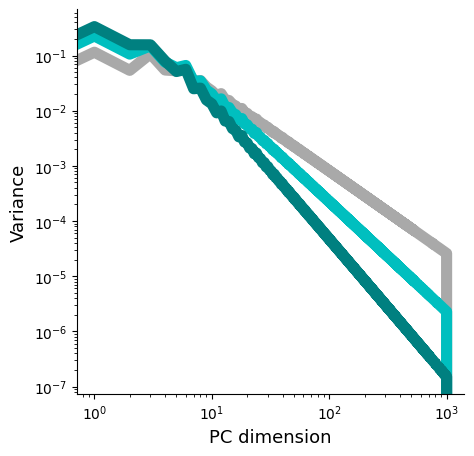

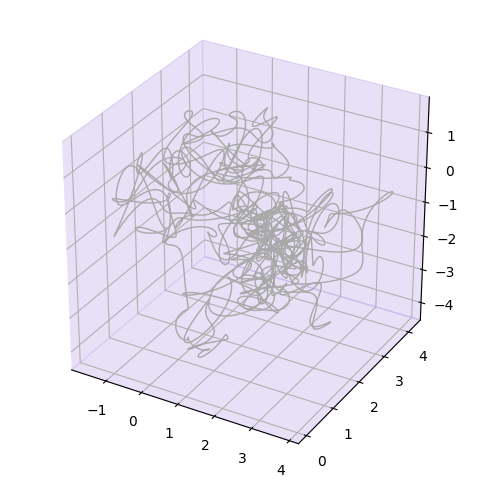

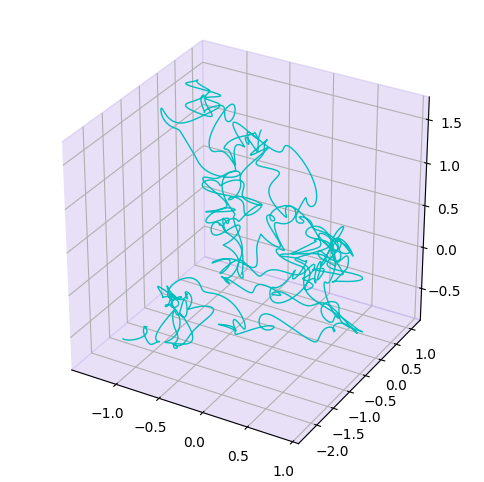

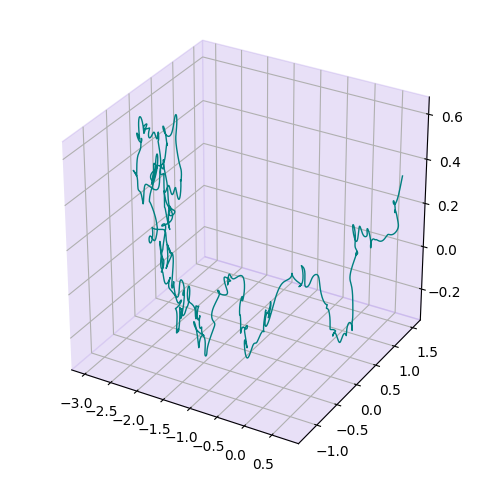

In [ ]:
#Plot eigenspectrum
col = ['darkgray', 'c', 'teal']
labels = ['10$^0$','10$^1$','10$^0$','10$^1$','10$^2$','10$^3$']

fig, axarr = plt.subplots(figsize = (5,5))

for i in range(len(alp)):
    data = eigenspec(X_list[i])
    xaxis = np.linspace(0,np.shape(data)[0], num = np.shape(data)[0]+1)
    yaxis = data
    axarr.plot(xaxis[:len(xaxis)-1], yaxis[:len(xaxis)-1], '-', linewidth = 8, markersize = 1, alpha = 1, color = col[i])
    slope = -1*stats.linregress(np.log10(xaxis[:len(xaxis)-1][10:-2]),np.log10(yaxis[:len(xaxis)-1][10:-2]))[0]
    print(slope)
axarr.set_xscale('log')
axarr.set_yscale('log')
#axarr.set_title(slope)
axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
axarr.set_ylabel('Variance', size = '13')
axarr.set_xlabel('PC dimension', size = '13')
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
axarr.set_xticklabels(labels)
plt.show()  


col = ['darkgray', 'c', 'teal']
#plot random projection


for i in range(len(alp)):
    fig = plt.figure(figsize= (6,6))
    ax = fig.add_subplot(projection='3d')
    dotplot = ax.plot(proj_list[i][1,:], proj_list[i][2,:],proj_list[i][3,:], alpha = 1, linewidth = 1, color = col[i])
    ax.w_xaxis.set_pane_color((0.7, 0.6, 0.9, 0.3))
    ax.w_yaxis.set_pane_color((0.7, 0.6, 0.9, 0.3))
    ax.w_zaxis.set_pane_color((0.7, 0.6, 0.9, 0.3))
    #ax.set_title(alp[i])
    plt.show()

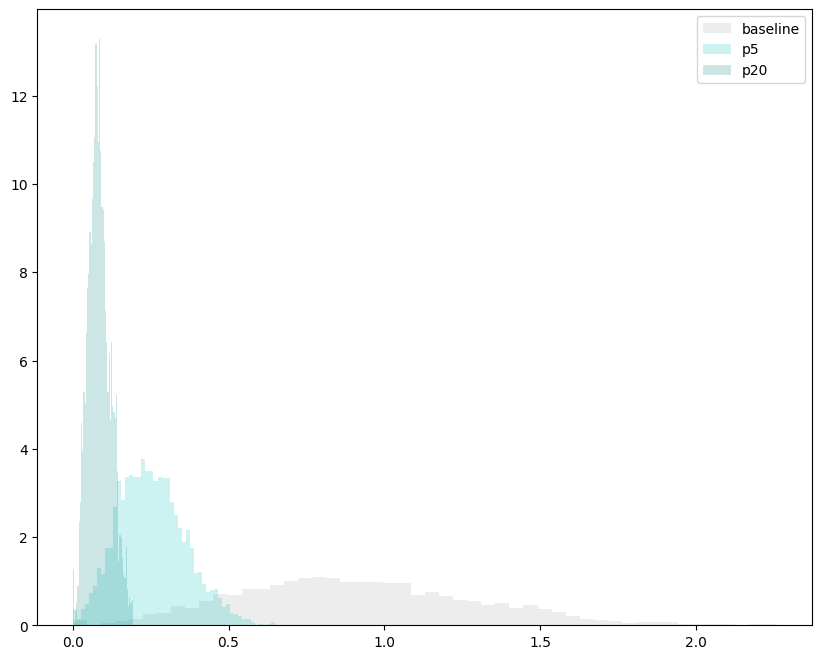

In [ ]:
  bln = proj_list[0][1:,:]
  bdist = np.zeros((bln.shape[1])-window)
  for i in range(bdist.shape[0]-window): 
      bdist[i] = np.linalg.norm(bln[:,i] - bln[:,i+window])#euclidean distance distribution

  p5 = proj_list[1][1:,:]
  p5dist = np.zeros((p5.shape[1])-window)
  for i in range(p5dist.shape[0]-window): 
      p5dist[i] = np.linalg.norm(p5[:,i] - p5[:,i+window])#euclidean distance distribution

  p20 = proj_list[2][1:,:]
  p20dist = np.zeros((p20.shape[1])-window)
  for i in range(p20dist.shape[0]-window): 
      p20dist[i] = np.linalg.norm(p20[:,i] - p20[:,i+window])#euclidean distance distribution


  fig, ax = plt.subplots(figsize = (10,8))
  ax.hist(bdist, bins = 50 ,alpha = 0.2, density = True, label = 'baseline', color = col[0])
  ax.hist(p5dist, bins = 50 ,alpha = 0.2, density = True, label = 'p5', color = col[1])
  ax.hist(p20dist, bins = 50 ,alpha = 0.2, density = True, label = 'p20', color = col[2])
  ax.legend()
  plt.show()

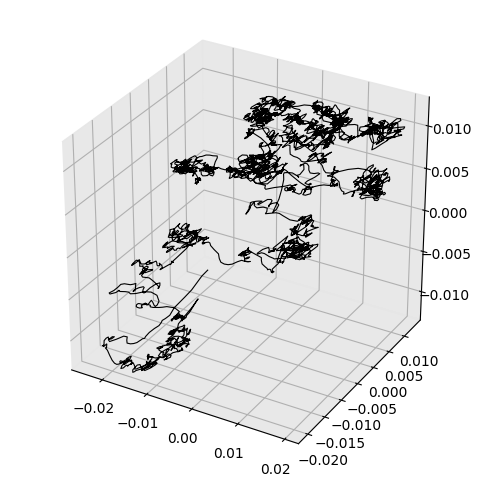

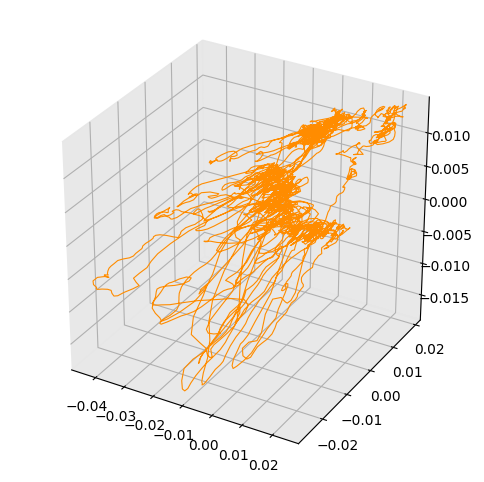

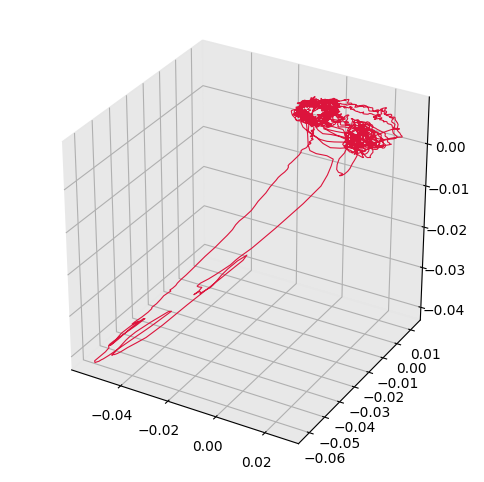

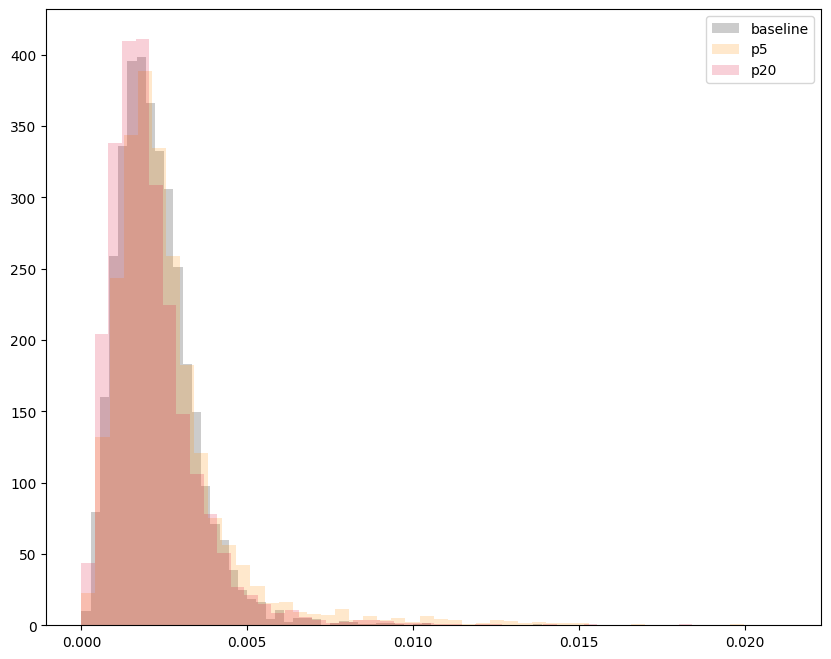

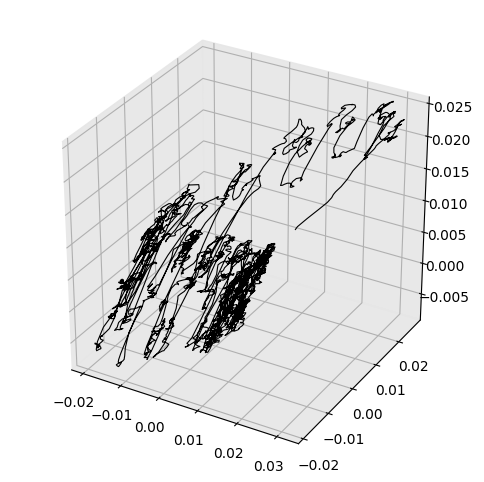

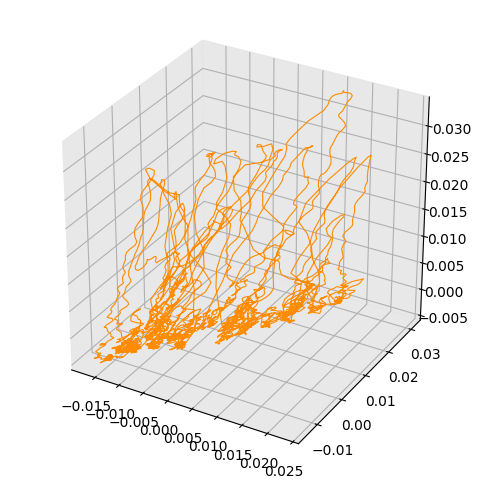

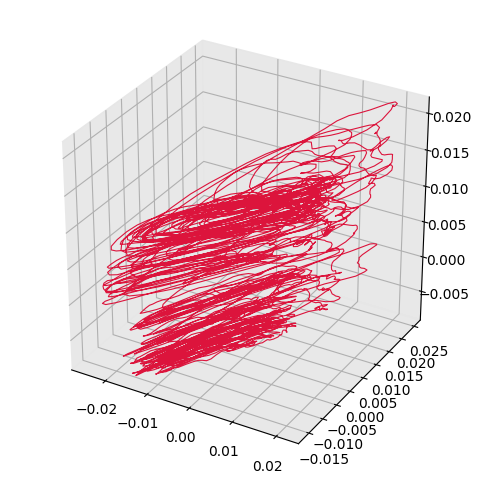

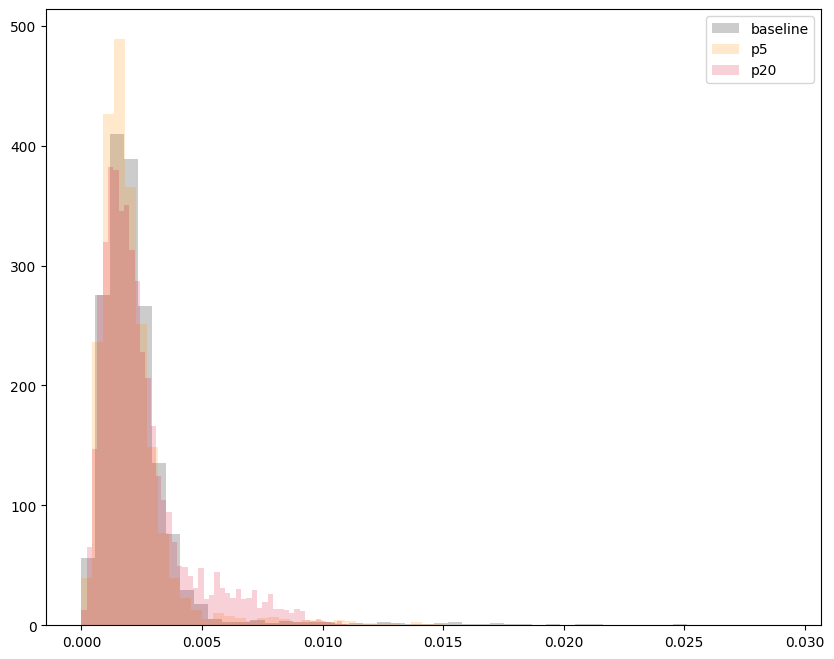

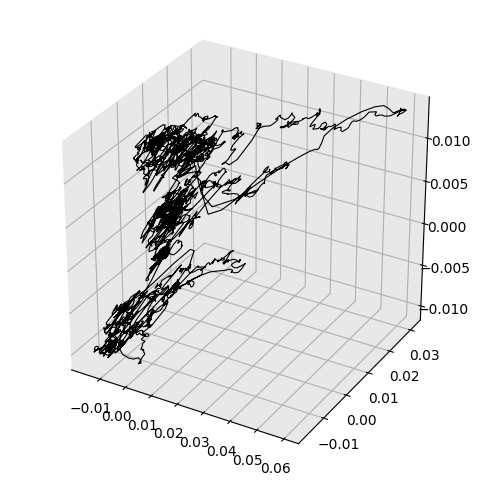

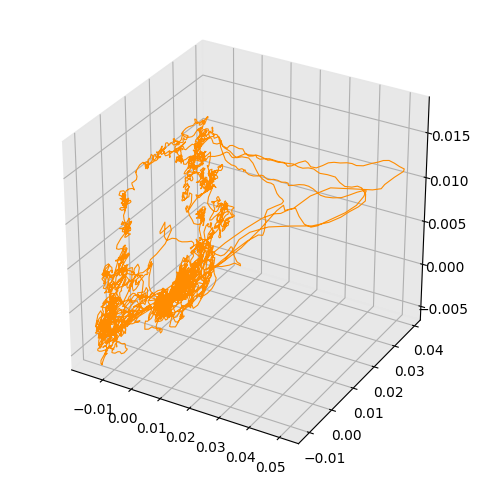

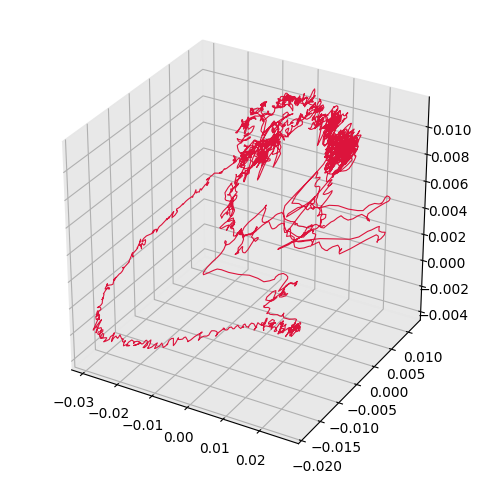

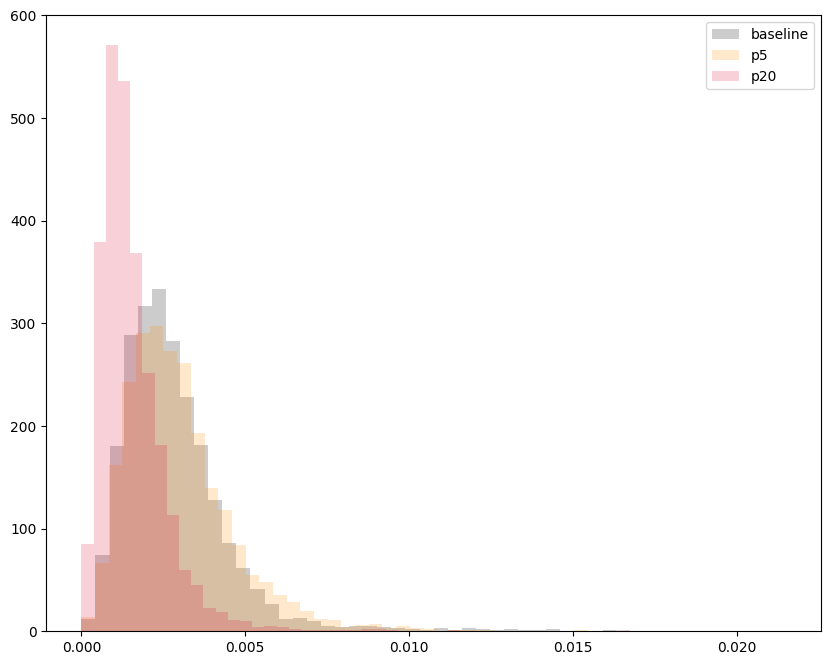

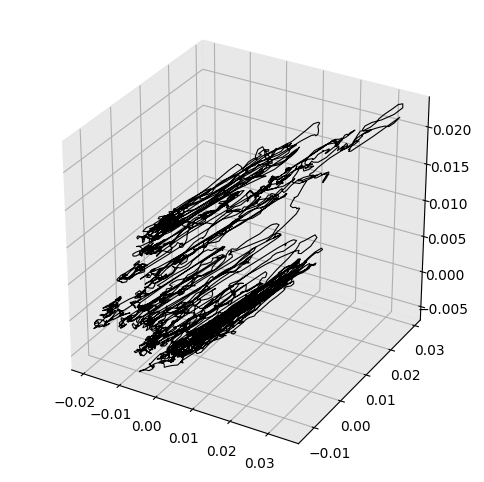

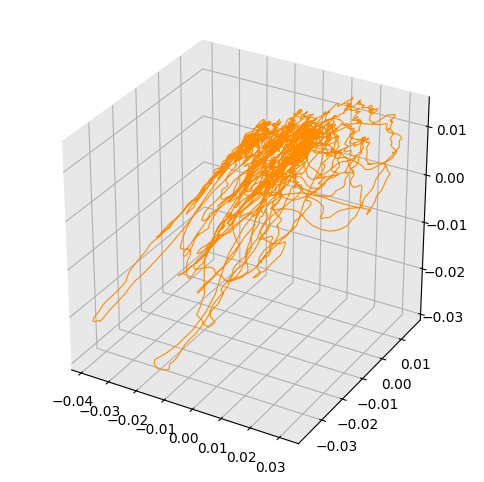

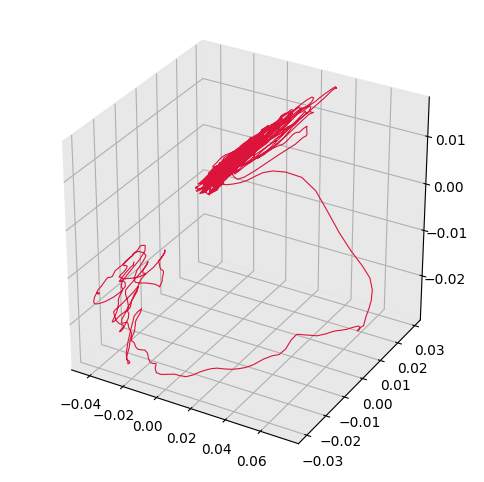

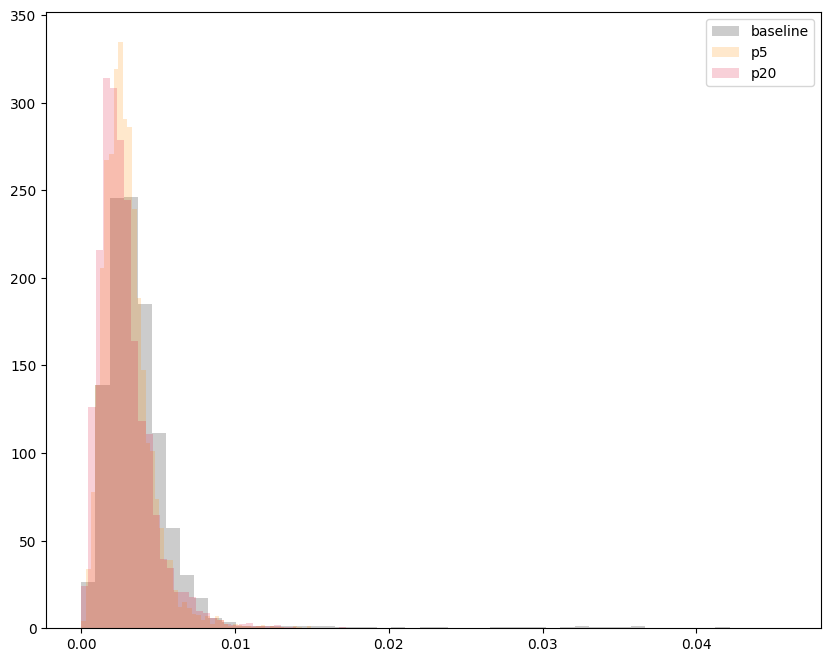

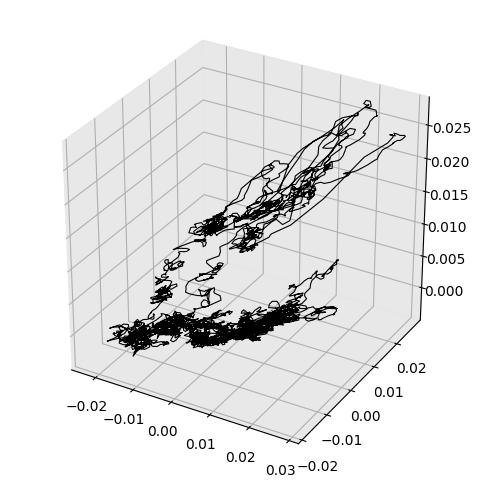

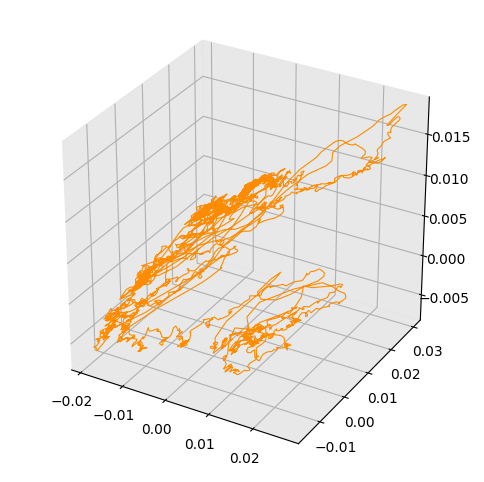

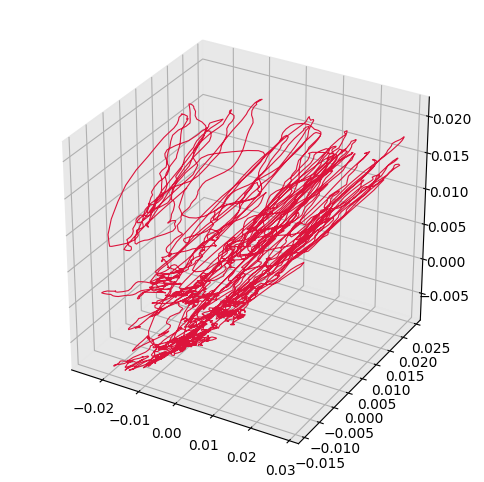

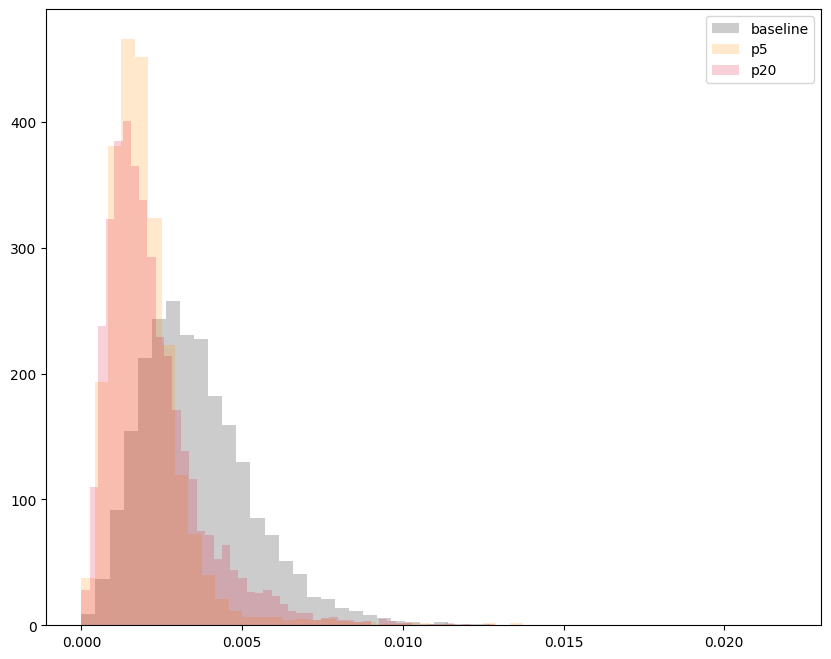

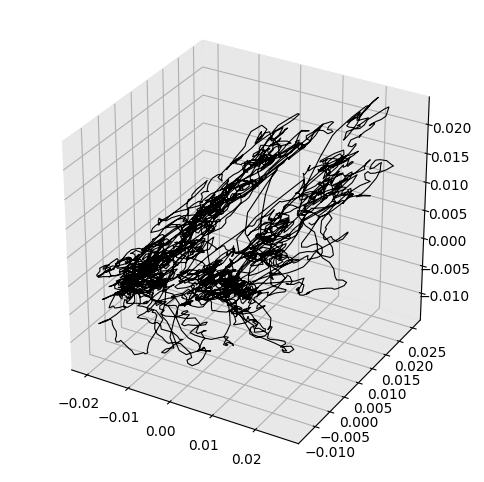

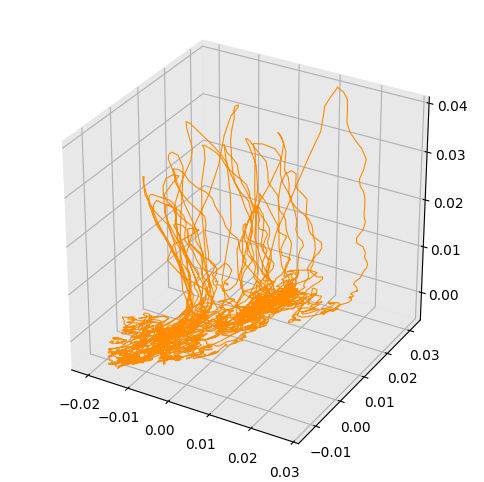

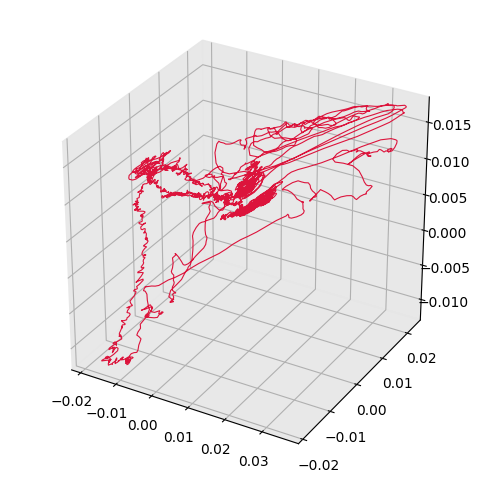

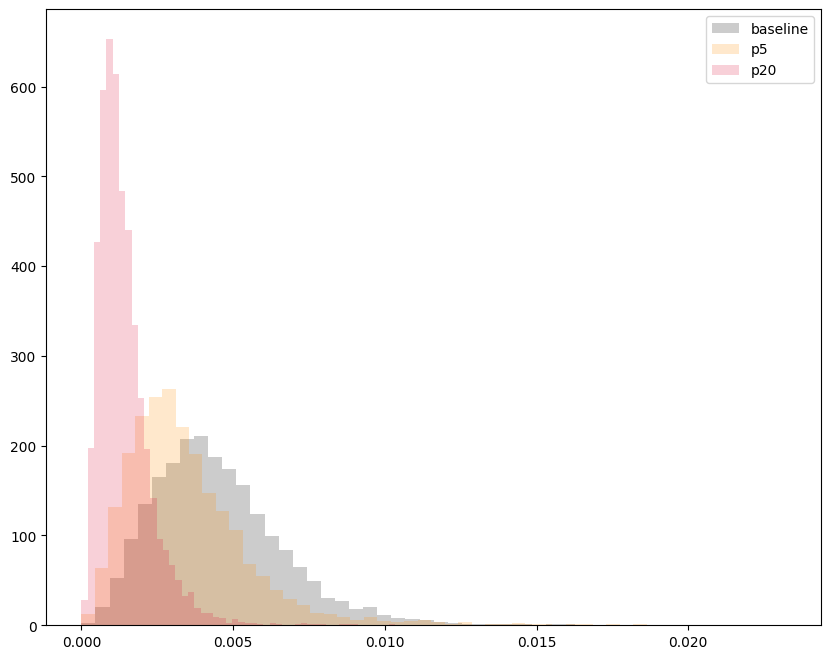

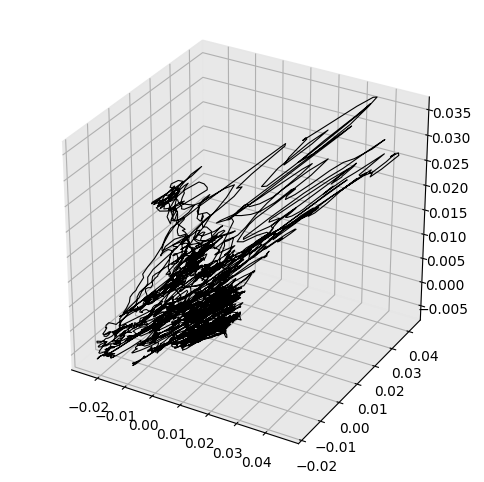

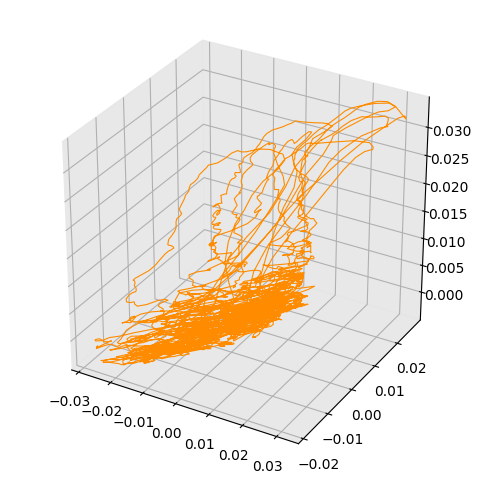

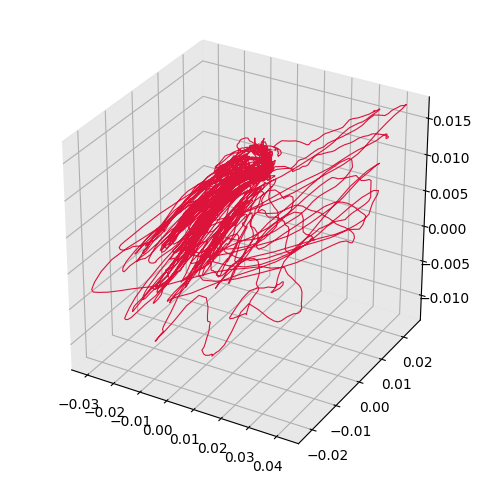

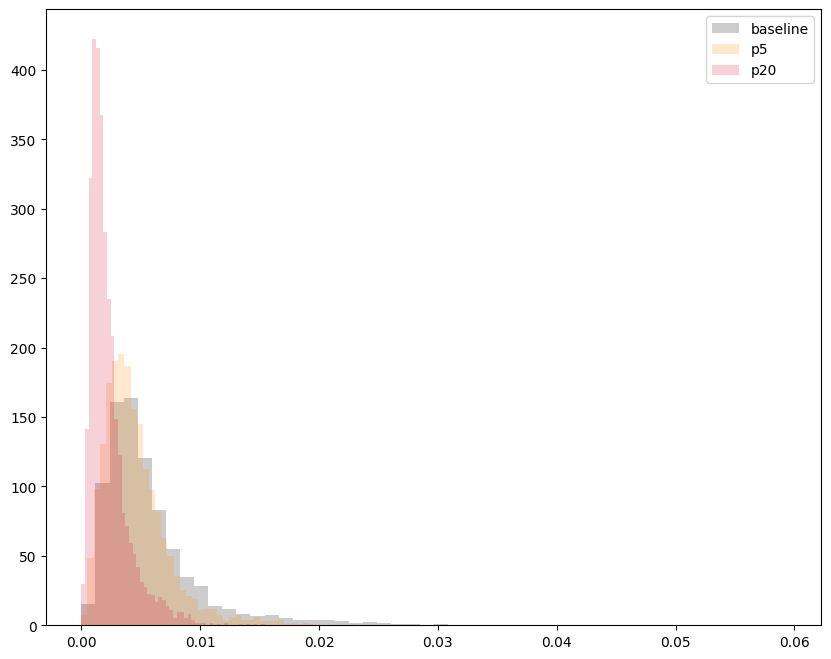

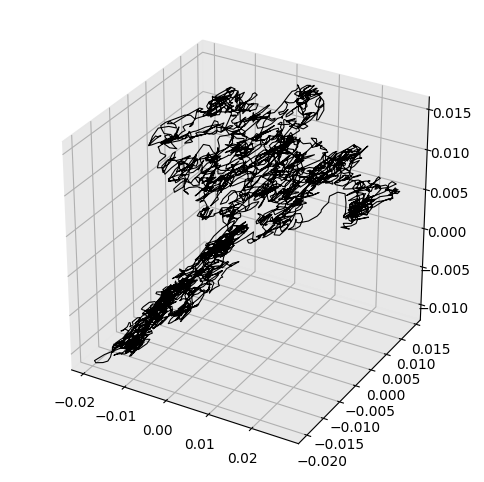

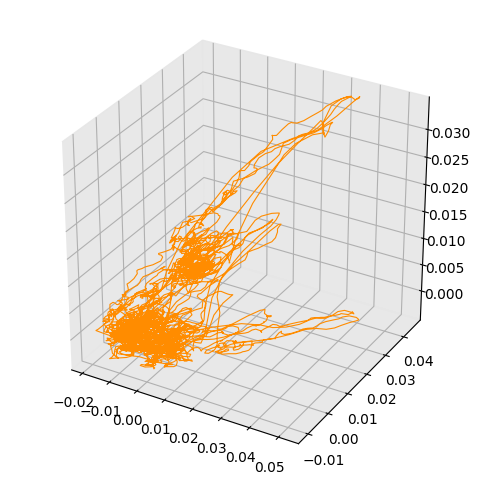

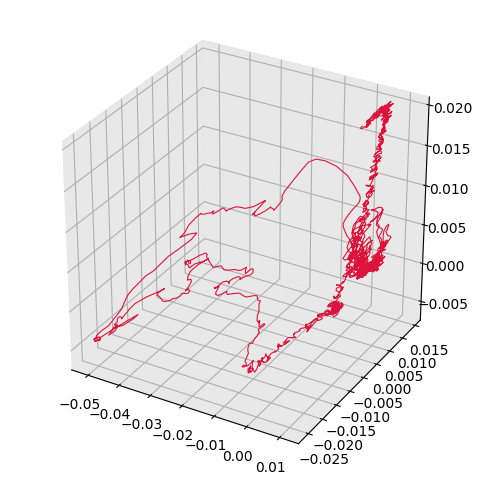

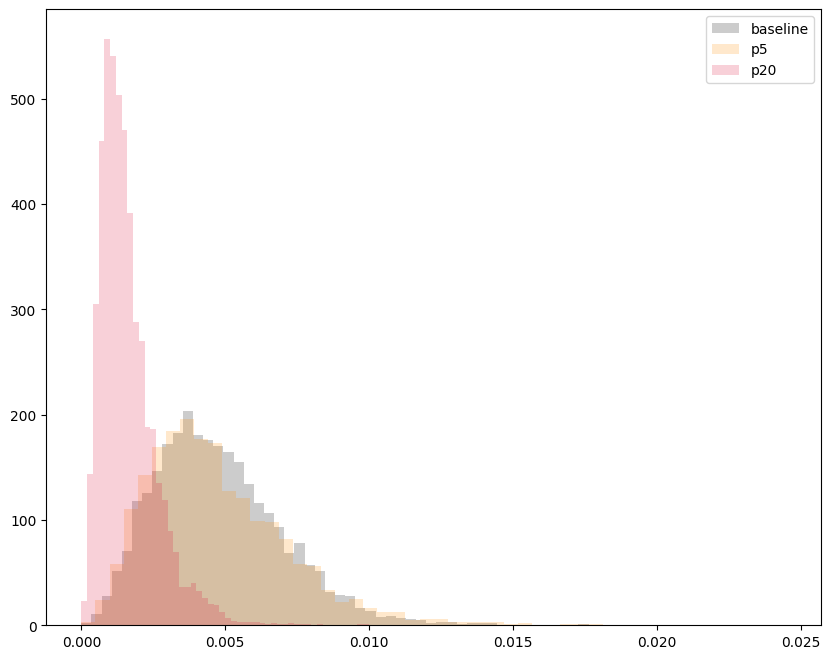

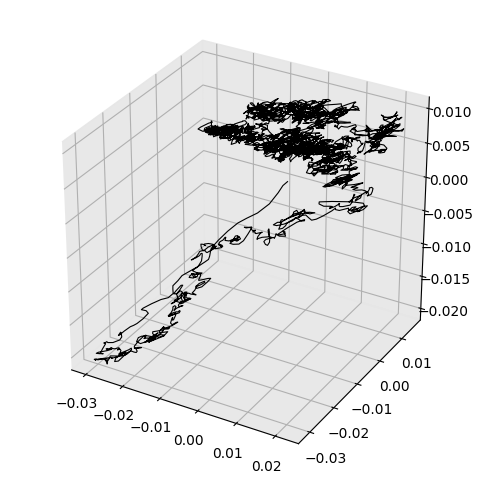

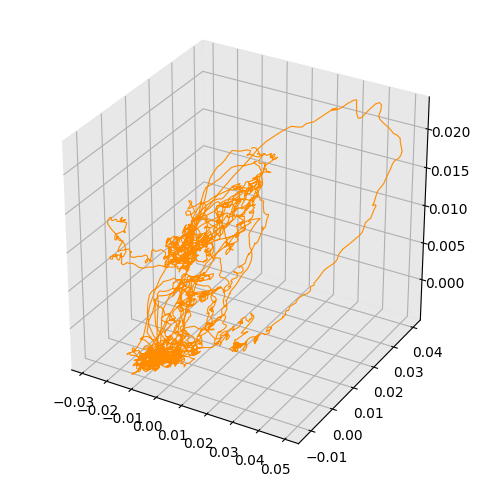

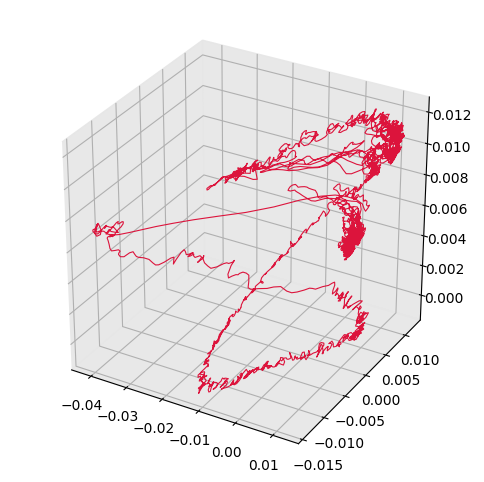

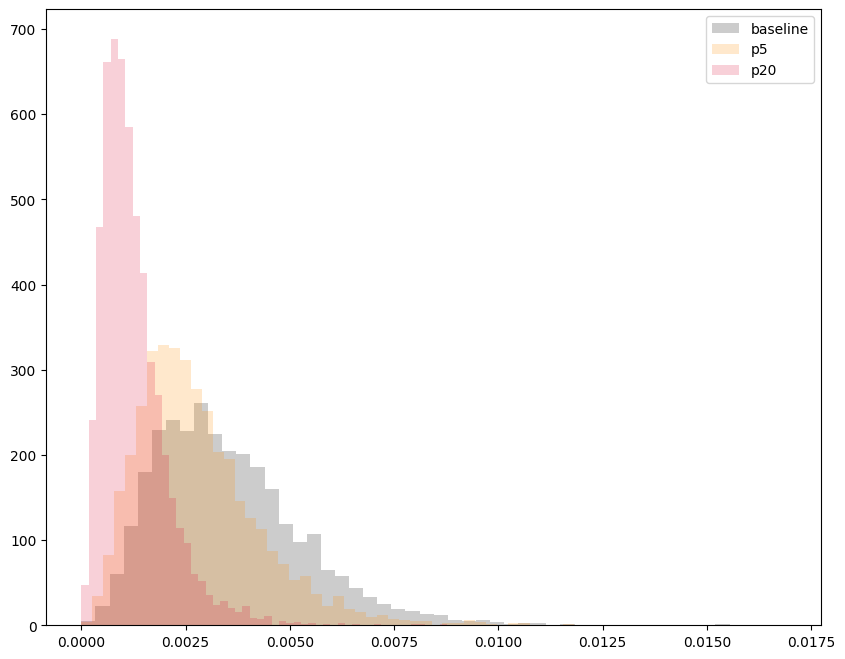

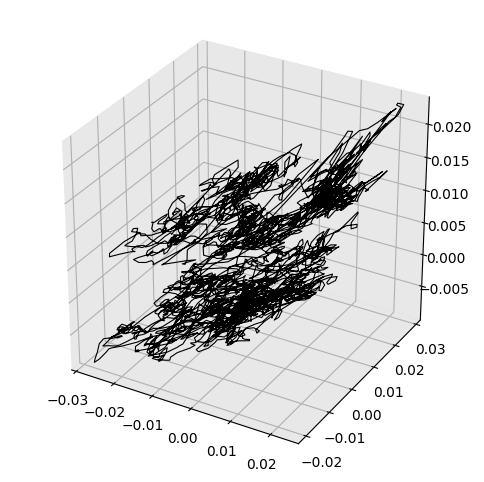

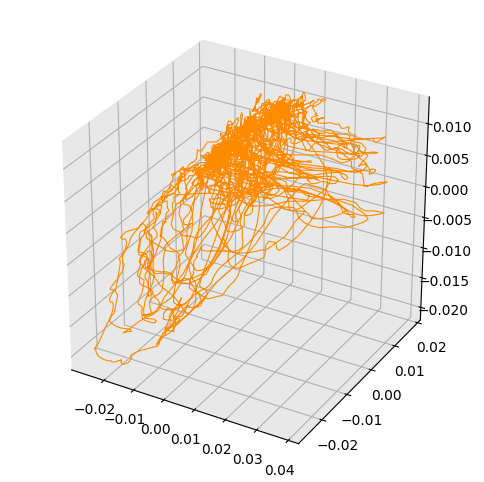

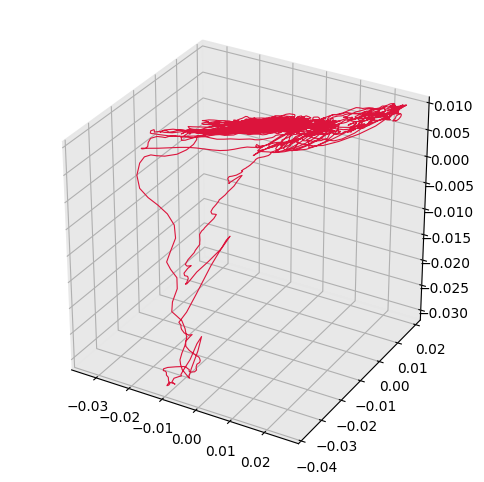

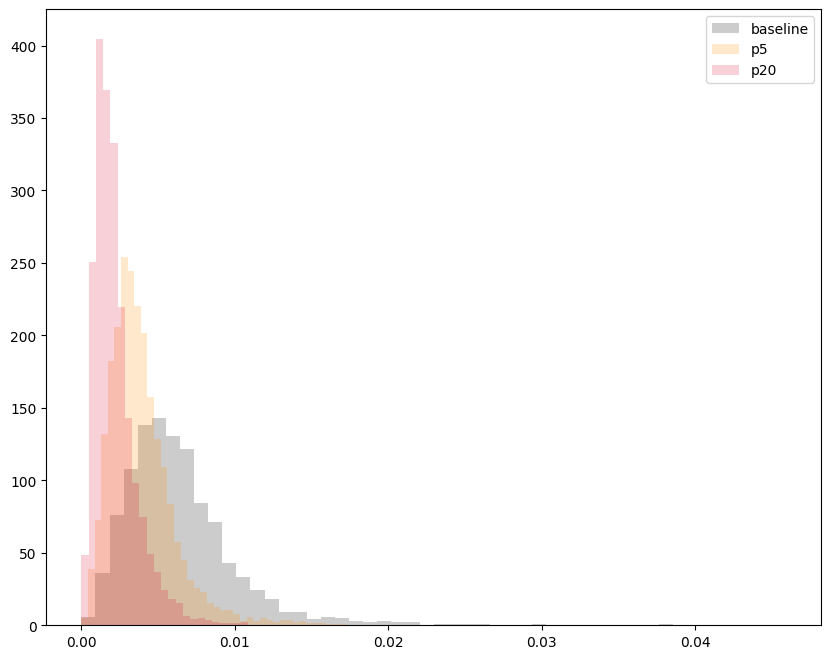

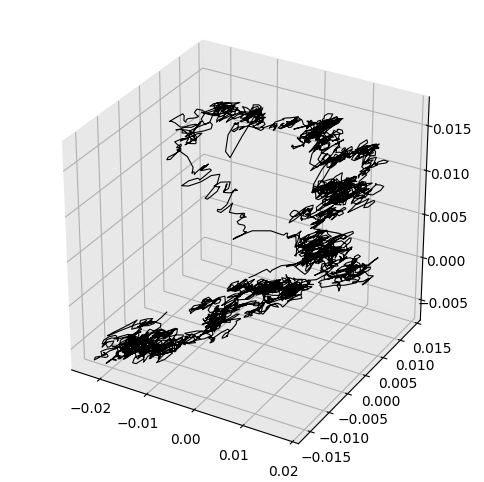

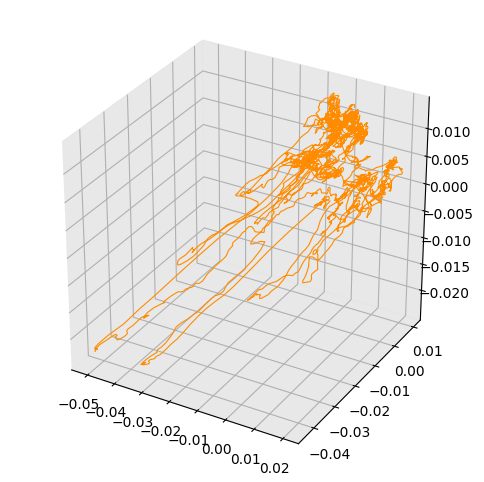

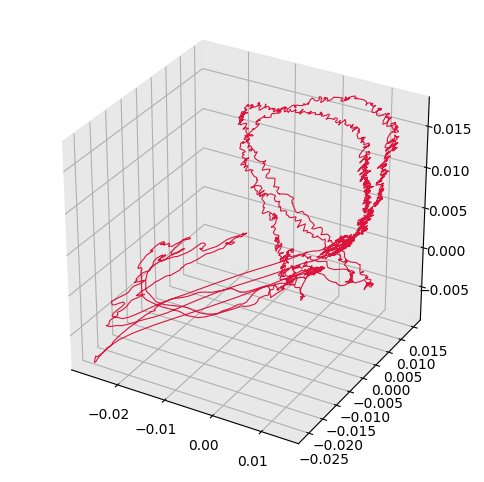

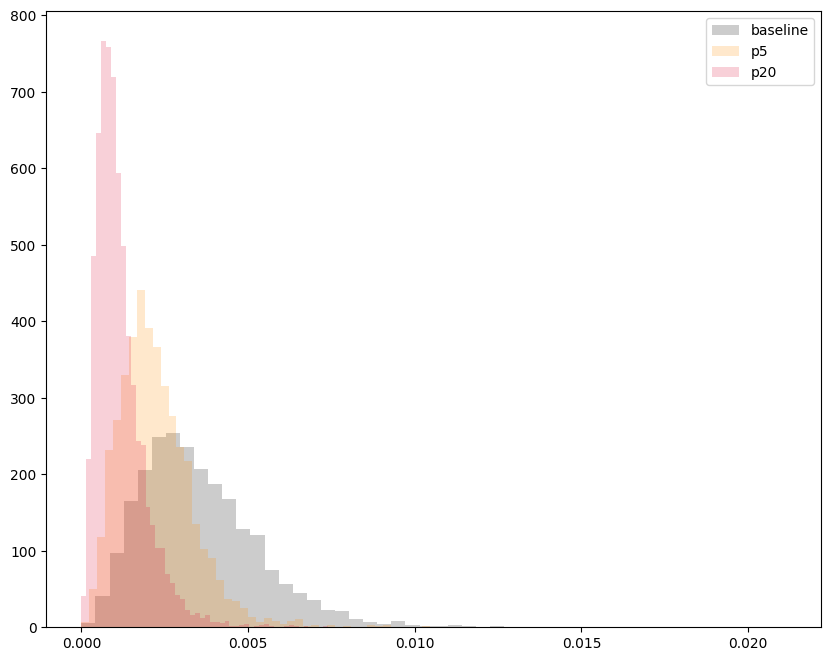

In [ ]:
from sklearn import decomposition
from scipy.ndimage import gaussian_filter
for choose in range(11):
  i, n_components = 9, 4

  data = np.load(bln_tlist[choose])
  pca = decomposition.PCA(n_components)
  fit1 = pca.fit(data)
  f_fit1 = gaussian_filter(fit1.components_, 1)
  from mpl_toolkits.mplot3d import Axes3D
  fig = plt.figure(figsize= (6,6))
  ax = fig.add_subplot(projection='3d')
  ax.plot3D(f_fit1[3,:],f_fit1[2,:],f_fit1[1,:], c = 'k', linewidth = 0.8)
  ax.w_xaxis.set_pane_color((0.9, 0.9, 0.9, 0.9))
  ax.w_yaxis.set_pane_color((0.9, 0.9, 0.9, 0.9))
  ax.w_zaxis.set_pane_color((0.9, 0.9, 0.9, 0.9))
  plt.show()

  from sklearn import decomposition

  i, n_components = 9, 4
  data = np.load(foc_tlist[choose])
  pca = decomposition.PCA(n_components)
  fit2 = pca.fit(data)
  f_fit2 = gaussian_filter(fit2.components_, 1)
  from mpl_toolkits.mplot3d import Axes3D
  fig = plt.figure(figsize= (6,6))
  ax = fig.add_subplot(projection='3d')
  ax.plot3D(f_fit2[3,:],f_fit2[2,:],f_fit2[1,:], c = 'darkorange', linewidth = 0.8)
  ax.w_xaxis.set_pane_color((0.9, 0.9, 0.9, 0.9))
  ax.w_yaxis.set_pane_color((0.9, 0.9, 0.9, 0.9))
  ax.w_zaxis.set_pane_color((0.9, 0.9, 0.9, 0.9))
  plt.show()


  from sklearn import decomposition

  i, n_components = 9, 4
  data = np.load(gen_tlist[choose])
  pca = decomposition.PCA(n_components)
  fit3 = pca.fit(data)
  f_fit3 = gaussian_filter(fit3.components_, 1)
  from mpl_toolkits.mplot3d import Axes3D
  fig = plt.figure(figsize= (6,6))
  ax = fig.add_subplot(projection='3d')
  ax.plot3D(f_fit3[3,:],f_fit3[2,:],f_fit3[1,:], c = 'crimson', linewidth = 0.8)
  ax.w_xaxis.set_pane_color((0.9, 0.9, 0.9, 0.9))
  ax.w_yaxis.set_pane_color((0.9, 0.9, 0.9, 0.9))
  ax.w_zaxis.set_pane_color((0.9, 0.9, 0.9, 0.9))
  plt.show()


  bln = fit1.components_[1:,:]
  bdist = np.zeros((bln.shape[1])-1)
  for i in range(bdist.shape[0]-1): 
      bdist[i] = np.linalg.norm(bln[:,i] - bln[:,i+1])#euclidean distance distribution

  p5 = fit2.components_[1:,:]
  p5dist = np.zeros((p5.shape[1])-1)
  for i in range(p5dist.shape[0]-1): 
      p5dist[i] = np.linalg.norm(p5[:,i] - p5[:,i+1])#euclidean distance distribution

  p20 = fit3.components_[1:,:]
  p20dist = np.zeros((p20.shape[1])-1)
  for i in range(p20dist.shape[0]-1): 
      p20dist[i] = np.linalg.norm(p20[:,i] - p20[:,i+1])#euclidean distance distribution


  fig, ax = plt.subplots(figsize = (10,8))
  ax.hist(bdist, bins = 50 ,alpha = 0.2, density = True, label = 'baseline', color = 'k')
  ax.hist(p5dist, bins = 50 ,alpha = 0.2, density = True, label = 'p5', color = 'darkorange')
  ax.hist(p20dist, bins = 50 ,alpha = 0.2, density = True, label = 'p20', color = 'crimson')

  ax.legend()
  plt.show()

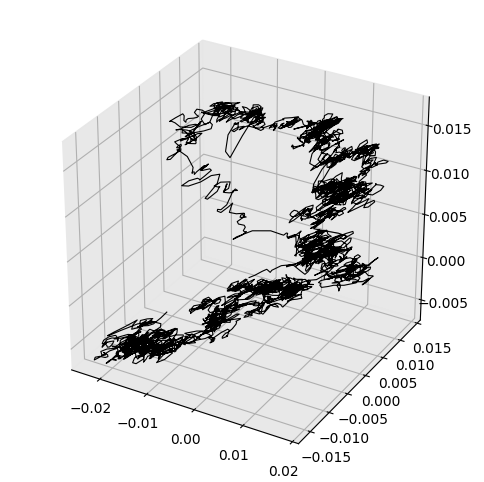

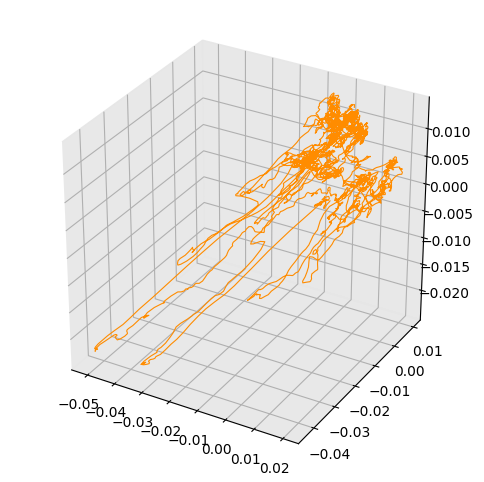

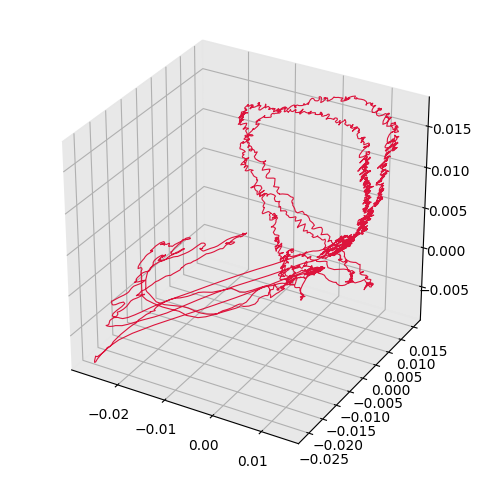

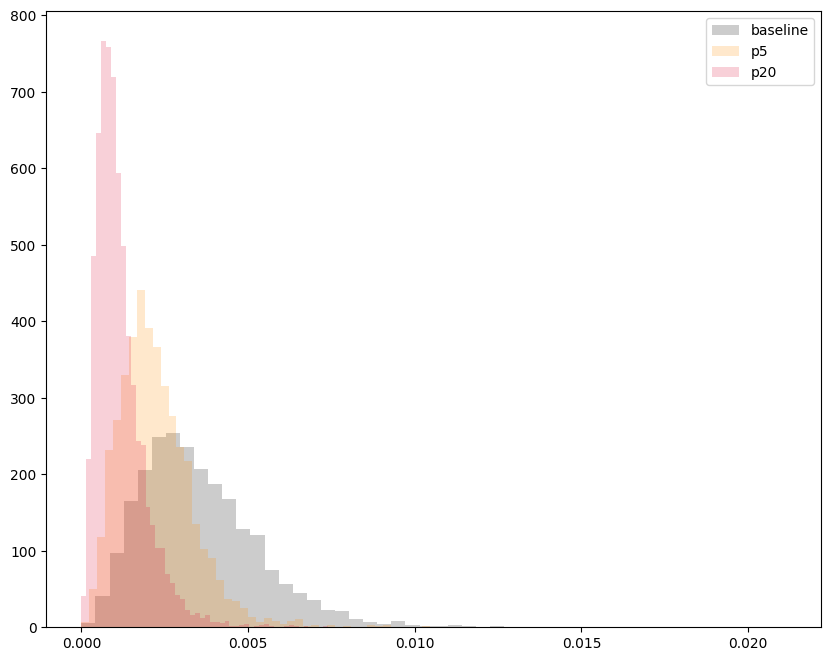

In [ ]:
from sklearn import decomposition
from scipy.ndimage import gaussian_filter

choose = 10
sigma = 1
w = 0.8
i, n_components = 9, 4

data = np.load(bln_tlist[choose])
pca = decomposition.PCA(n_components)
fit1 = pca.fit(data)
f_fit1 = gaussian_filter(fit1.components_, sigma)
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize= (6,6))
ax = fig.add_subplot(projection='3d')
ax.plot3D(f_fit1[3,:],f_fit1[2,:],f_fit1[1,:], c = 'k', linewidth = w)
ax.w_xaxis.set_pane_color((0.9, 0.9, 0.9, 0.9))
ax.w_yaxis.set_pane_color((0.9, 0.9, 0.9, 0.9))
ax.w_zaxis.set_pane_color((0.9, 0.9, 0.9, 0.9))
plt.show()

from sklearn import decomposition

i, n_components = 9, 4
data = np.load(foc_tlist[choose])
pca = decomposition.PCA(n_components)
fit2 = pca.fit(data)
f_fit2 = gaussian_filter(fit2.components_, sigma)
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize= (6,6))
ax = fig.add_subplot(projection='3d')
ax.plot3D(f_fit2[3,:],f_fit2[2,:],f_fit2[1,:], c = 'darkorange', linewidth = w)
ax.w_xaxis.set_pane_color((0.9, 0.9, 0.9, 0.9))
ax.w_yaxis.set_pane_color((0.9, 0.9, 0.9, 0.9))
ax.w_zaxis.set_pane_color((0.9, 0.9, 0.9, 0.9))
plt.show()


from sklearn import decomposition

i, n_components = 9, 4
data = np.load(gen_tlist[choose])
pca = decomposition.PCA(n_components)
fit3 = pca.fit(data)
f_fit3 = gaussian_filter(fit3.components_, sigma)
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize= (6,6))
ax = fig.add_subplot(projection='3d')
ax.plot3D(f_fit3[3,:],f_fit3[2,:],f_fit3[1,:], c = 'crimson', linewidth = w)
ax.w_xaxis.set_pane_color((0.9, 0.9, 0.9, 0.9))
ax.w_yaxis.set_pane_color((0.9, 0.9, 0.9, 0.9))
ax.w_zaxis.set_pane_color((0.9, 0.9, 0.9, 0.9))
plt.show()


bln = fit1.components_[1:,:]
bdist = np.zeros((bln.shape[1])-1)
for i in range(bdist.shape[0]-1): 
    bdist[i] = np.linalg.norm(bln[:,i] - bln[:,i+1])#euclidean distance distribution

p5 = fit2.components_[1:,:]
p5dist = np.zeros((p5.shape[1])-1)
for i in range(p5dist.shape[0]-1): 
    p5dist[i] = np.linalg.norm(p5[:,i] - p5[:,i+1])#euclidean distance distribution

p20 = fit3.components_[1:,:]
p20dist = np.zeros((p20.shape[1])-1)
for i in range(p20dist.shape[0]-1): 
    p20dist[i] = np.linalg.norm(p20[:,i] - p20[:,i+1])#euclidean distance distribution


fig, ax = plt.subplots(figsize = (10,8))
ax.hist(bdist, bins = 50 ,alpha = 0.2, density = True, label = 'baseline', color = 'k')
ax.hist(p5dist, bins = 50 ,alpha = 0.2, density = True, label = 'p5', color = 'darkorange')
ax.hist(p20dist, bins = 50 ,alpha = 0.2, density = True, label = 'p20', color = 'crimson')

ax.legend()
plt.show()

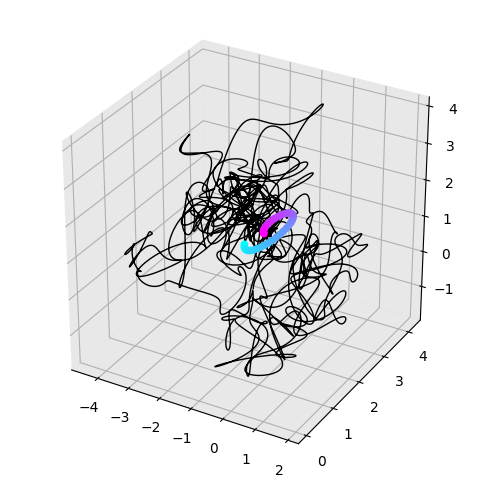

In [ ]:
curr_data = proj_list[0]


import random
window = 40
start = random.randint(0,curr_data.shape[1] - window)
stop = start + window
start,stop


fig = plt.figure(figsize= (6,6))
ax = fig.add_subplot(projection='3d')
ax.plot3D(curr_data[3,:],curr_data[2,:],curr_data[1,:], c = 'k', linewidth = 1)
#ax.plot3D(curr_data[3,:][start:stop],curr_data[2,:][start:stop],curr_data[1,:][start:stop], c = 'cyan', linewidth = 2)

#dotplot = ax.plot(proj_list[i][1,:], proj_list[i][2,:],proj_list[i][3,:], alpha = 1, linewidth = 1, color = col[i])
#dotplot = ax.plot(proj_list[i][1,:], proj_list[i][2,:],proj_list[i][3,:], alpha = 1, linewidth = 1, color = col[i])

ax.scatter3D(curr_data[3,:][start:stop],curr_data[2,:][start:stop],curr_data[1,:][start:stop], c= np.linspace(0,window, window),cmap = 'cool', linewidth = 1, alpha = 1)
ax.w_xaxis.set_pane_color((0.9, 0.9, 0.9, 0.9))
ax.w_yaxis.set_pane_color((0.9, 0.9, 0.9, 0.9))
ax.w_zaxis.set_pane_color((0.9, 0.9, 0.9, 0.9))
plt.show()

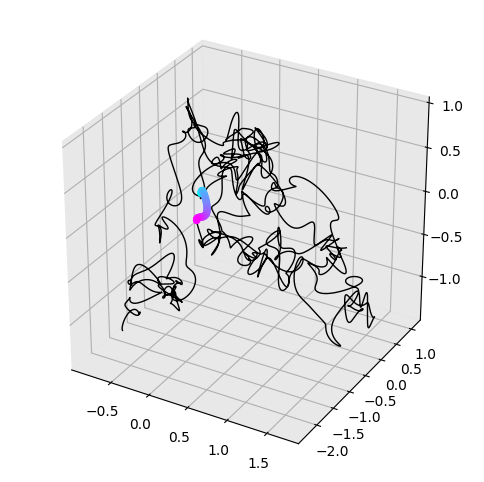

In [ ]:
curr_data = proj_list[1]

import random
window = 40
start = random.randint(0,curr_data.shape[1] - window)
stop = start + window
start,stop


fig = plt.figure(figsize= (6,6))
ax = fig.add_subplot(projection='3d')
ax.plot3D(curr_data[3,:],curr_data[2,:],curr_data[1,:], c = 'k', linewidth = 1)
#ax.plot3D(curr_data[3,:][start:stop],curr_data[2,:][start:stop],curr_data[1,:][start:stop], c = 'cyan', linewidth = 2)

#dotplot = ax.plot(proj_list[i][1,:], proj_list[i][2,:],proj_list[i][3,:], alpha = 1, linewidth = 1, color = col[i])
#dotplot = ax.plot(proj_list[i][1,:], proj_list[i][2,:],proj_list[i][3,:], alpha = 1, linewidth = 1, color = col[i])

ax.scatter3D(curr_data[3,:][start:stop],curr_data[2,:][start:stop],curr_data[1,:][start:stop], c= np.linspace(0,window, window),cmap = 'cool', linewidth = 1, alpha = 1)
ax.w_xaxis.set_pane_color((0.9, 0.9, 0.9, 0.9))
ax.w_yaxis.set_pane_color((0.9, 0.9, 0.9, 0.9))
ax.w_zaxis.set_pane_color((0.9, 0.9, 0.9, 0.9))
plt.show()

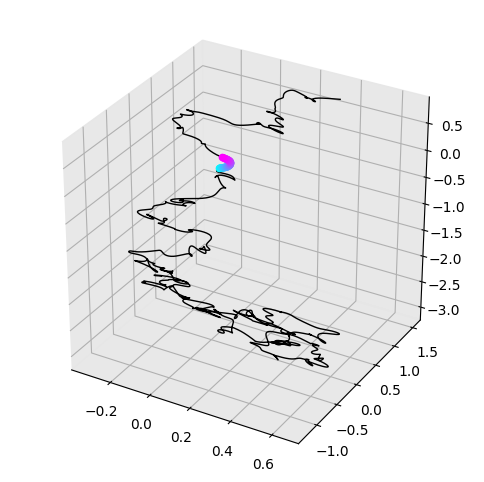

In [ ]:
curr_data = proj_list[2]

import random
window = 40
start = random.randint(0,curr_data.shape[1] - window)
stop = start + window
start,stop

fig = plt.figure(figsize= (6,6))
ax = fig.add_subplot(projection='3d')
ax.plot3D(curr_data[3,:],curr_data[2,:],curr_data[1,:], c = 'k', linewidth = 1)
#ax.plot3D(curr_data[3,:][start:stop],curr_data[2,:][start:stop],curr_data[1,:][start:stop], c = 'cyan', linewidth = 2)

#dotplot = ax.plot(proj_list[i][1,:], proj_list[i][2,:],proj_list[i][3,:], alpha = 1, linewidth = 1, color = col[i])
#dotplot = ax.plot(proj_list[i][1,:], proj_list[i][2,:],proj_list[i][3,:], alpha = 1, linewidth = 1, color = col[i])

ax.scatter3D(curr_data[3,:][start:stop],curr_data[2,:][start:stop],curr_data[1,:][start:stop], c= np.linspace(0,window, window),cmap = 'cool', linewidth = 1, alpha = 1)
ax.w_xaxis.set_pane_color((0.9, 0.9, 0.9, 0.9))
ax.w_yaxis.set_pane_color((0.9, 0.9, 0.9, 0.9))
ax.w_zaxis.set_pane_color((0.9, 0.9, 0.9, 0.9))
plt.show()

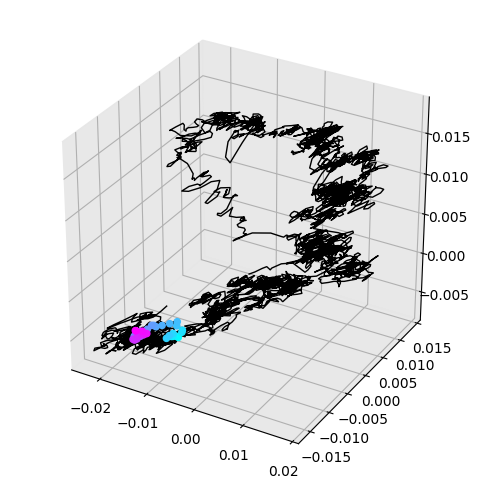

In [ ]:
from sklearn import decomposition
from scipy.ndimage import gaussian_filter

choose = 10
sigma = 1
w = 0.8

curr_data = f_fit1

import random
window = 40
start = random.randint(0,curr_data.shape[1] - window)
stop = start + window
start,stop

fig = plt.figure(figsize= (6,6))
ax = fig.add_subplot(projection='3d')
ax.plot3D(curr_data[3,:],curr_data[2,:],curr_data[1,:], c = 'k', linewidth = 1)
#ax.plot3D(curr_data[3,:][start:stop],curr_data[2,:][start:stop],curr_data[1,:][start:stop], c = 'cyan', linewidth = 2)

#dotplot = ax.plot(proj_list[i][1,:], proj_list[i][2,:],proj_list[i][3,:], alpha = 1, linewidth = 1, color = col[i])
#dotplot = ax.plot(proj_list[i][1,:], proj_list[i][2,:],proj_list[i][3,:], alpha = 1, linewidth = 1, color = col[i])

ax.scatter3D(curr_data[3,:][start:stop],curr_data[2,:][start:stop],curr_data[1,:][start:stop], c= np.linspace(0,window, window),cmap = 'cool', linewidth = 1, alpha = 1)
ax.w_xaxis.set_pane_color((0.9, 0.9, 0.9, 0.9))
ax.w_yaxis.set_pane_color((0.9, 0.9, 0.9, 0.9))
ax.w_zaxis.set_pane_color((0.9, 0.9, 0.9, 0.9))
plt.show()

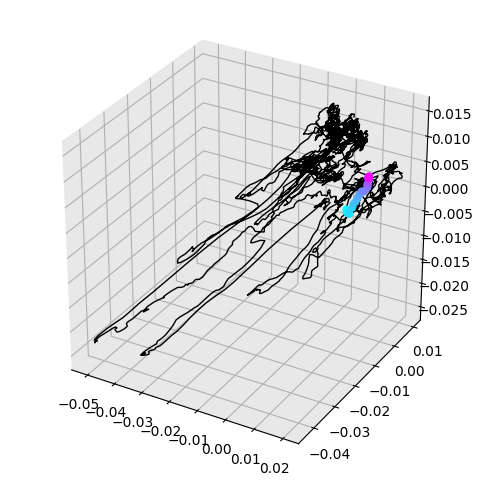

In [ ]:
from sklearn import decomposition
from scipy.ndimage import gaussian_filter

choose = 10
sigma = 1
w = 0.8

curr_data = f_fit2

import random
window = 40
start = random.randint(0,curr_data.shape[1] - window)
stop = start + window
start,stop

fig = plt.figure(figsize= (6,6))
ax = fig.add_subplot(projection='3d')
ax.plot3D(curr_data[3,:],curr_data[2,:],curr_data[1,:], c = 'k', linewidth = 1)
#ax.plot3D(curr_data[3,:][start:stop],curr_data[2,:][start:stop],curr_data[1,:][start:stop], c = 'cyan', linewidth = 2)

#dotplot = ax.plot(proj_list[i][1,:], proj_list[i][2,:],proj_list[i][3,:], alpha = 1, linewidth = 1, color = col[i])
#dotplot = ax.plot(proj_list[i][1,:], proj_list[i][2,:],proj_list[i][3,:], alpha = 1, linewidth = 1, color = col[i])

ax.scatter3D(curr_data[3,:][start:stop],curr_data[2,:][start:stop],curr_data[1,:][start:stop], c= np.linspace(0,window, window),cmap = 'cool', linewidth = 1, alpha = 1)
ax.w_xaxis.set_pane_color((0.9, 0.9, 0.9, 0.9))
ax.w_yaxis.set_pane_color((0.9, 0.9, 0.9, 0.9))
ax.w_zaxis.set_pane_color((0.9, 0.9, 0.9, 0.9))
plt.show()

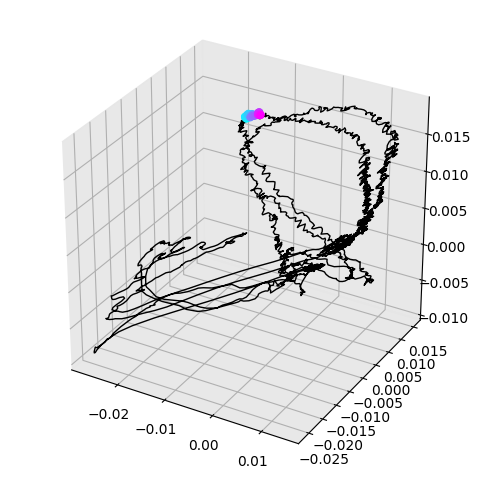

In [ ]:
from sklearn import decomposition
from scipy.ndimage import gaussian_filter

choose = 10
sigma = 1
w = 0.8

curr_data = f_fit3

import random
window = 40
start = random.randint(0,curr_data.shape[1] - window)
stop = start + window
start,stop

fig = plt.figure(figsize= (6,6))
ax = fig.add_subplot(projection='3d')
ax.plot3D(curr_data[3,:],curr_data[2,:],curr_data[1,:], c = 'k', linewidth = 1)
#ax.plot3D(curr_data[3,:][start:stop],curr_data[2,:][start:stop],curr_data[1,:][start:stop], c = 'cyan', linewidth = 2)

#dotplot = ax.plot(proj_list[i][1,:], proj_list[i][2,:],proj_list[i][3,:], alpha = 1, linewidth = 1, color = col[i])
#dotplot = ax.plot(proj_list[i][1,:], proj_list[i][2,:],proj_list[i][3,:], alpha = 1, linewidth = 1, color = col[i])

ax.scatter3D(curr_data[3,:][start:stop],curr_data[2,:][start:stop],curr_data[1,:][start:stop], c= np.linspace(0,window, window),cmap = 'cool', linewidth = 1, alpha = 1)
ax.w_xaxis.set_pane_color((0.9, 0.9, 0.9, 0.9))
ax.w_yaxis.set_pane_color((0.9, 0.9, 0.9, 0.9))
ax.w_zaxis.set_pane_color((0.9, 0.9, 0.9, 0.9))
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize = (10,8))
ax.hist(bdist, bins = 50 ,alpha = 0.2, density = True, label = 'baseline', color = 'k')
ax.hist(p5dist, bins = 50 ,alpha = 0.2, density = True, label = 'p5', color = 'darkorange')
ax.hist(p20dist, bins = 50 ,alpha = 0.2, density = True, label = 'p20', color = 'crimson')
ax.legend()
plt.show()

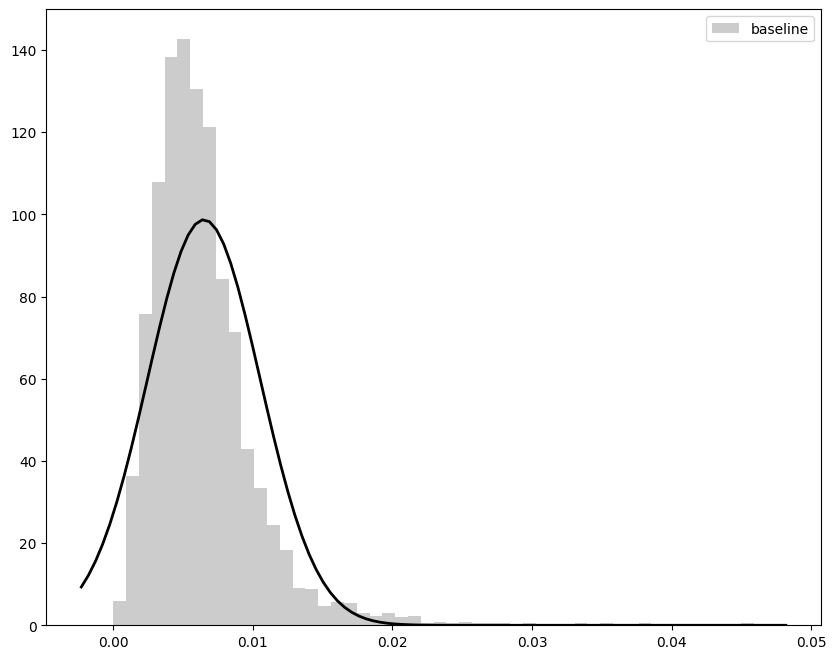

In [ ]:
fig, ax = plt.subplots(figsize = (10,8))


from scipy.stats import norm
mu, std = norm.fit(bdist)
ax.hist(bdist, bins = 50 ,alpha = 0.2, density = True, label = 'baseline', color = 'k')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)

mu, std = norm.fit(bdist)
ax.hist(p5dist, bins = 50 ,alpha = 0.2, density = True, label = 'p5', color = 'darkorange')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'darkorange', linewidth=2)


mu, std = norm.fit(bdist)
ax.hist(p20dist, bins = 50 ,alpha = 0.2, density = True, label = 'p20', color = 'crimson')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'crimson', linewidth=2)
ax.legend()
plt.show()

In [ ]:
 0.05/2import numpy as np 
import scipy.stats as stat
import matplotlib.pyplot as plt

#Functional form for power law
def powerlaw(n,lam):
    zeta=np.sum(1.0/np.arange(a,b+1)**lam)
    return(n**(-lam)/zeta)

#Functional form for lognormal
def lognormal(n,mu,sig):
    return(1.0/n/np.sqrt(2*np.pi*sig**2)*np.exp(-(np.log(n)-mu)**2/(2*sig**2)))


#Calculate loglikelihood for power law given the data
#Likelihoods across all random draws, given your data
def LogLikelihood(lam, sizes, M, a, b):
    #normalisation factor for all lambda draws - normalises a distribution to sum of probability = 1 (by summing across all possible values in density)
    zetamat=np.power.outer(1.0/np.arange(a,b+1),lam) #Matrix of normalisation constants for each lambda draw, at each size: each row =  size**-current lambda, for every size from max to min
    zeta=np.sum(zetamat,0) #Norm vector - for each lambda draw - sum of norm constants for entire size max-min range at each lambda
    norm=-M*np.log(zeta) #Contribution of zeta to the likelihood
    nprod=-lam*np.sum(np.log(sizes)) #Loglikelihood calculation, given the data
    loglik=nprod+norm #Normalised loglikelihood
    return(loglik) 

#Calculate loglikelihood for lognormal
#Likelihoods across all random draws, given your data
def LogLikelihood_LN(mu,sig, sizes, M , a, b):
    T1 = -np.sum(np.log(sizes))
    T2_mat = np.subtract.outer(np.log(sizes),mu)**2
    T2 = -np.sum(T2_mat,0)/(2*sig**2)
    T0 = -M*np.log(np.sqrt(2*np.pi) * sig )
    loglik=T0+T1+T2
    return(loglik) 


#IMPORTANCE SAMPLER - for power law - monte carlo sampling from two different distributions
#OUTPUT - posterior average exponent, log marginal likelihood, effective sample size = how good is the sampler
def IS(npart, sizes, M, a, b):
    lambda_sample=np.random.uniform(0.1,5,npart) #randomly sample lambda (exponent values)

    #Weights - loglikelihoods of your data for each lambda * (weight by) log probability of drawing each lambda sample from the prior, divided by log probability of drawing each lambda sample from the proposal
    #Likelihood of data weighted by prior expectation of lambda, and proposal expected lambda - cancel out the effect of the proposal
    weights=LogLikelihood(lambda_sample, sizes, M, a, b)+stat.norm.logpdf(lambda_sample,1,3)-stat.uniform.logpdf(lambda_sample,0.1,5)
    maxw=np.max(weights)
    w2 = np.exp(weights-maxw)
    w2_sum = np.sum(w2)
    ESS=1.0/(np.sum((w2/w2_sum)**2))
    mean_lambda = np.dot(lambda_sample,w2)/w2_sum #average of the lambda value for the posterior distribution
    #marginal likelihood = empirical means of all the weights
    marglik = maxw + np.log(np.sum(np.exp(weights-maxw)))-np.log(npart) #Take the exponent of logs to unlog, before summing/then divded by ncounts
    return([mean_lambda, marglik, LogLikelihood(lambda_sample, sizes, M , a, b), ESS])

#IMPORTANCE SAMPLER - for lognormal - monte carlo sampling from two different distributions
#OUTPUT - posterior average exponent, log marginal likelihood, effective sample size = how good is the sampler
def IS_LN(npart, sizes, M, a, b):
    mu_sample = np.random.uniform(-2.0,2.0,npart) #randomly sample mu
    sig_sample = np.random.uniform(0.1,5.0,npart) #randomly sample sigma
    weights=LogLikelihood_LN(mu_sample,sig_sample, sizes, M, a, b) #Add in prior + proposal?
    maxw=np.max(weights)
    w2 = np.exp(weights-maxw)
    w2_sum = np.sum(w2)
    ESS=1.0/(np.sum((w2/w2_sum)**2))
    wmax_ID=np.argmax(w2)
    mean_mu = mu_sample[wmax_ID]
    mean_sig = sig_sample[wmax_ID]
    #marginal likelihood = empirical means of all the weights
    marglik = maxw + np.log(np.sum(np.exp(weights-maxw)))-np.log(npart)
    return([mean_mu,mean_sig, marglik,  LogLikelihood_LN(mu_sample, sig_sample, sizes, M, a, b), ESS])

def marglik_power_loglik(data, npart):
    import numpy as np
    #Size
    sizes=data
    M=len(sizes)
    a=min(sizes) #define xmin
    b=max(sizes) #define xmax
    ln=IS_LN(npart, sizes, M, a, b)
    po=IS(npart, sizes, M, a, b)
    return(po[1] - ln[2])

In [ ]:

min(avdistcut)

1.0

In [ ]:
import functools
import operator

data_list = bln_list, foc_list, gen_list
data_type = 3 #dwell time distribution
dwellv_list = list(range(len(data_list)))
for i in range(len(data_list)):
  dwellv = list(range(len(data_list[i])))
  for e in range(len(dwellv)):
    ok = np.load(data_list[i][e], allow_pickle=True)[data_type]
    dwellv[e] = np.array(functools.reduce(operator.iconcat, ok, []))
    dwellv_list[i] = dwellv

bln = -1123.2685687425862
foc = -1.8926636247633724
gen = -962.4359662086268


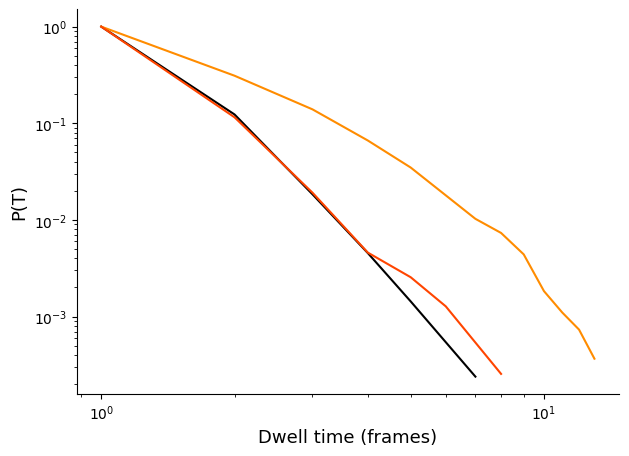

bln = -876.1449321489763
foc = -482.231841343518
gen = -241.33088590319358


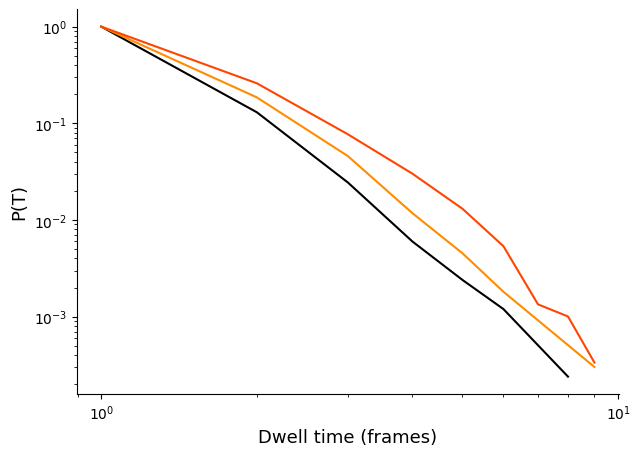

bln = -990.8088950501633
foc = -1390.5556645772813
gen = -281.4304871385484


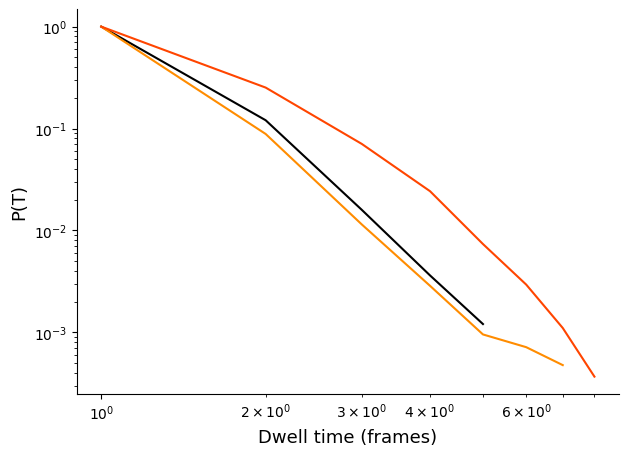

bln = -332.5218217643578
foc = -446.53211105675405
gen = -599.678535459718


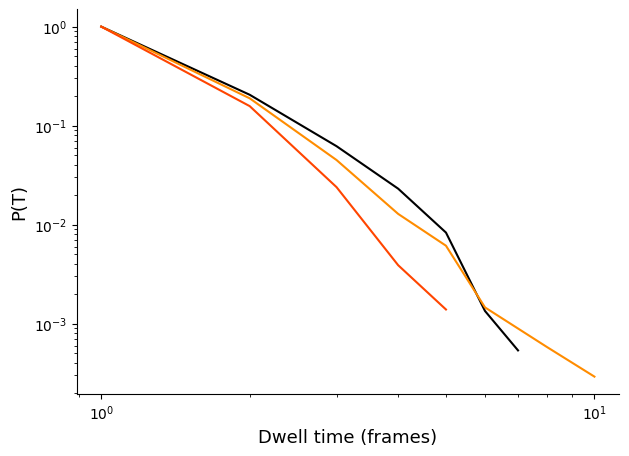

bln = -869.1903050457577
foc = -496.77667514704376
gen = -376.8771385768878


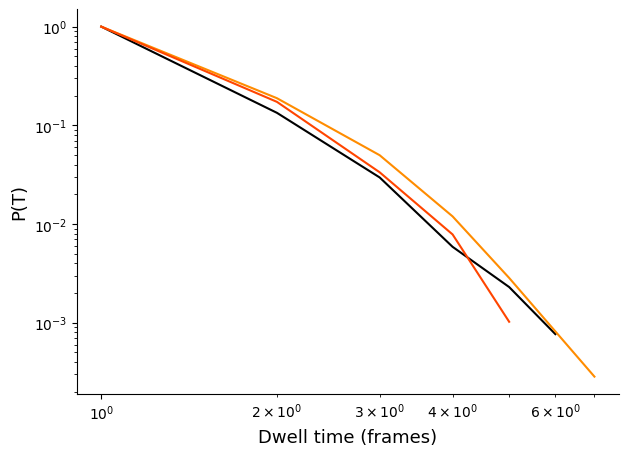

bln = -281.4156879907705
foc = -159.30123810730083
gen = -122.64721230830673


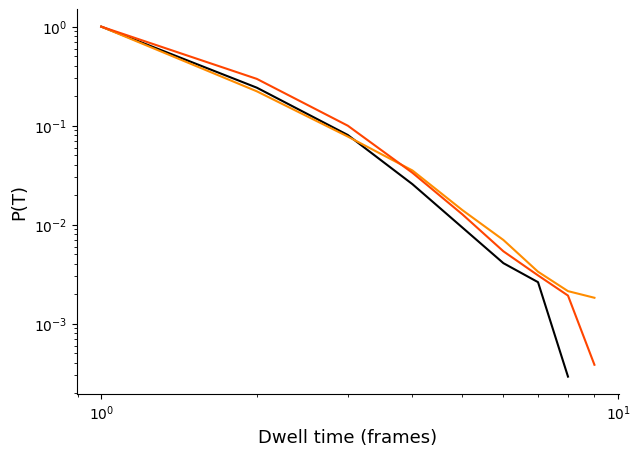

bln = -791.9468458813462
foc = -1409.095021101346
gen = -643.9115326560388


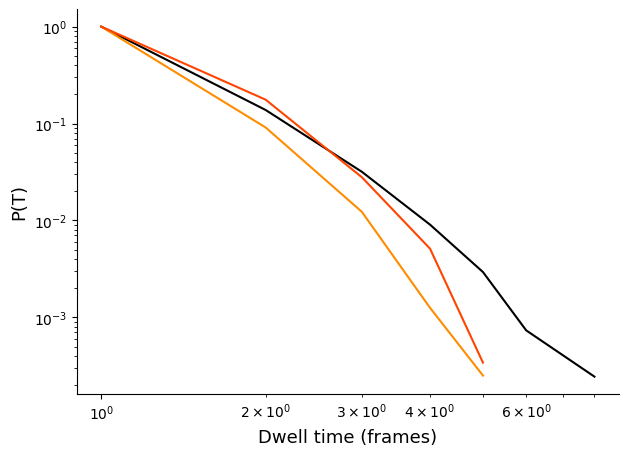

bln = -288.6803665359794
foc = -710.3307118700616
gen = -484.8152577322094


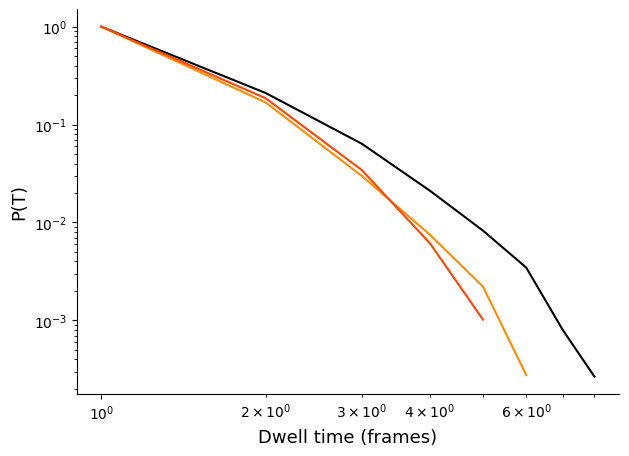

bln = -473.0608688532816
foc = -605.3543989895918
gen = -955.2013755545061


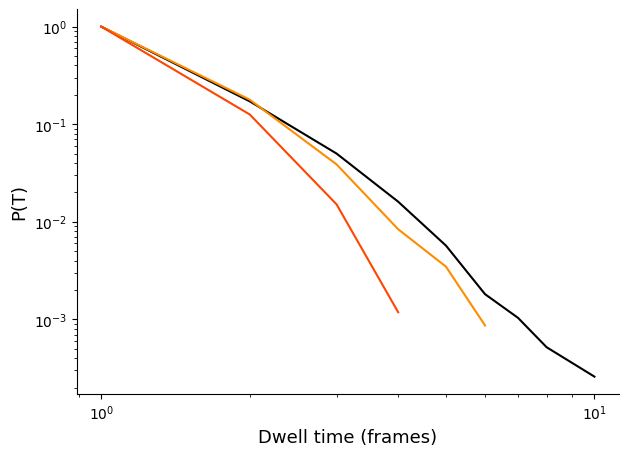

bln = -813.3541008942921
foc = -297.1378821976218
gen = -876.9763290017086


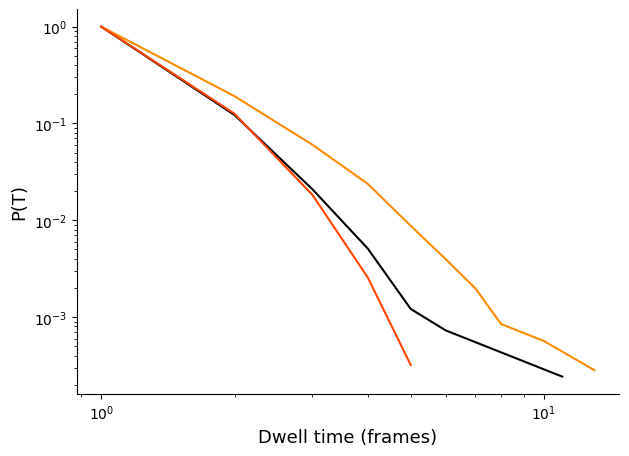

In [ ]:
import powerlaw

for x in range(11):
  if x !=4:

    fig, axarr = plt.subplots(figsize = (7,5))

    avdistcut = dwellv_list[0][x]
    powerlaw.plot_ccdf(avdistcut, c = 'k')
    blnllr = marglik_power_loglik(avdistcut, 2000)

    avdistcut = dwellv_list[1][x]
    powerlaw.plot_ccdf(avdistcut, c = 'darkorange')
    focllr = marglik_power_loglik(avdistcut, 2000)

    avdistcut = dwellv_list[2][x]
    powerlaw.plot_ccdf(avdistcut, c = 'orangered')
    genllr = marglik_power_loglik(avdistcut, 2000)

    #axarr.set_xscale('log')
    #axarr.set_yscale('log')
    #plt.ylim(bottom = 0.00001)  
    #plt.xlim(right = 1000)  
    print('bln = ' + str(blnllr))
    print('foc = ' + str(focllr))
    print('gen = ' + str(genllr))
    axarr.set_ylabel('P(T)', size = '13')
    axarr.set_xlabel('Dwell time (frames)', size = '13')
    axarr.spines['top'].set_visible(False)
    axarr.spines['right'].set_visible(False)
    plt.show()

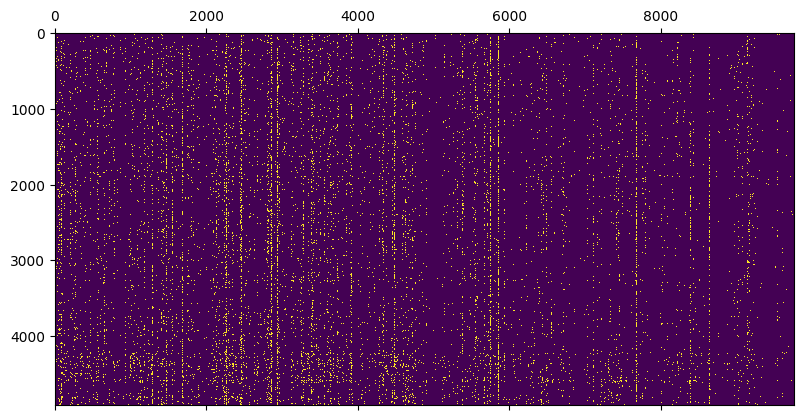

In [ ]:
data_list = bln_list, foc_list, gen_list
data_type = 0 #number of states
staten_list = list(range(len(data_list)))
for i in range(len(data_list)):
  staten = np.zeros(len(data_list[i]))
  for e in range(len(staten)):
    staten[e] = np.load(data_list[i][e], allow_pickle=True)[data_type]
    staten_list[i] = staten

# Further analysis
- dwell time in each state
- state transitions - hopping from one state to the next

In [ ]:
import more_itertools as mit

p_state, m_dwell = np.zeros(len(sub_clust)),np.zeros(len(sub_clust))
for i in range(len(sub_clust)):
  p_state[i] = len(np.where(all_clust == sub_clust[i])[0])/len(all_clust)

  dur_list = [list(group) for group in mit.consecutive_groups(np.where(all_clust == sub_clust[i])[0])]
  vec = []
  for t in range(len(dur_list)):
    vec = np.append(vec, len(dur_list[t]))
  m_dwell[i] = np.mean(vec)

# Visualise metastable states

In [ ]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib import colors
fig, axarr = plt.subplots(1,3,figsize = (13,6))

for i in range(len(bin_list)):
    curr = bin_list[i]
    axarr[i].matshow(curr, cmap = 'Greys')
plt.show()